# *Wine-Quality Prediction*

# 1. Regression and out-of-distribution prediction

In [1]:
#Importing Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import metrics

## **RED WINE QUALITY**

In [2]:
# Downloading red wine quality file
link='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
RED=pd.read_csv(link,sep=";")

# View Head of RED dataset
RED.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [3]:
# View Tail of RED dataset
RED.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

In [4]:
# Check for NULL Entries
RED.notnull().all()

fixed acidity           True
volatile acidity        True
citric acid             True
residual sugar          True
chlorides               True
free sulfur dioxide     True
total sulfur dioxide    True
density                 True
pH                      True
sulphates               True
alcohol                 True
quality                 True
dtype: bool

Hence there is no null entry.

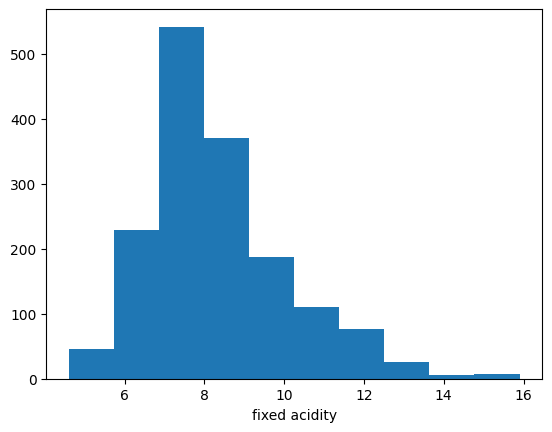

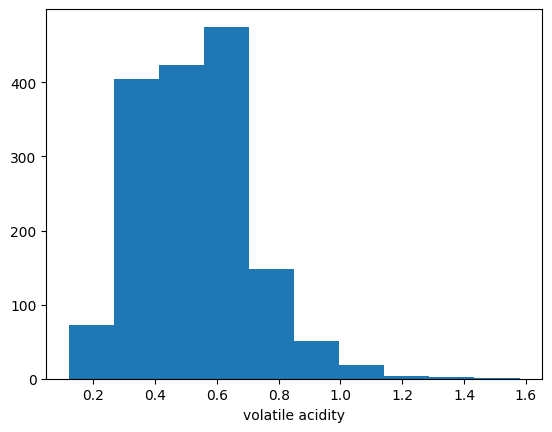

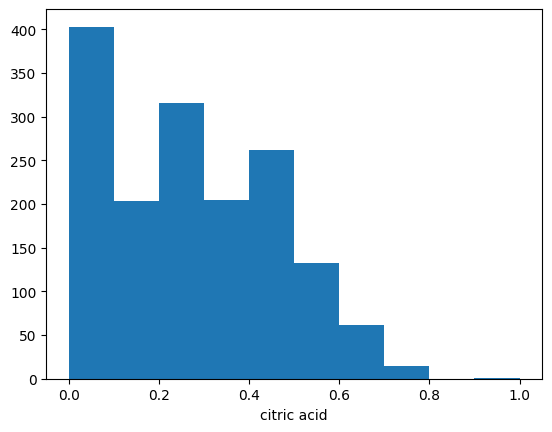

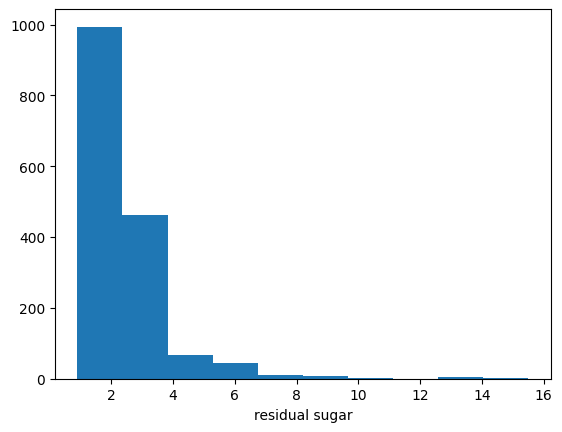

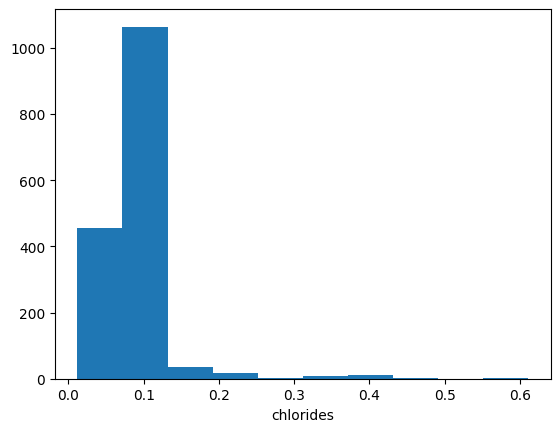

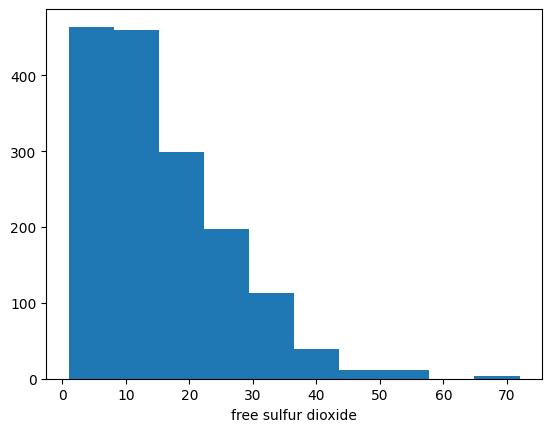

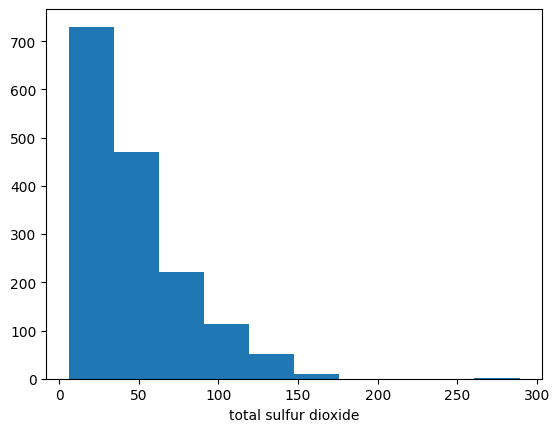

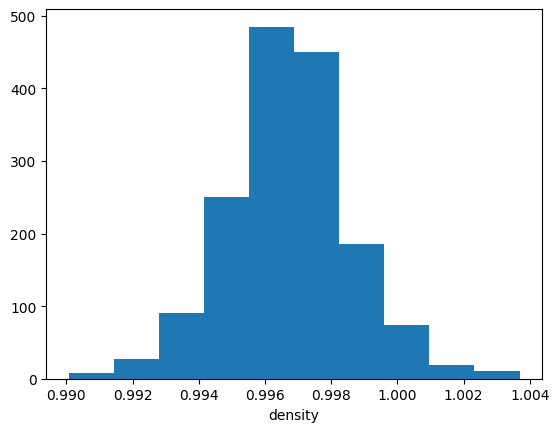

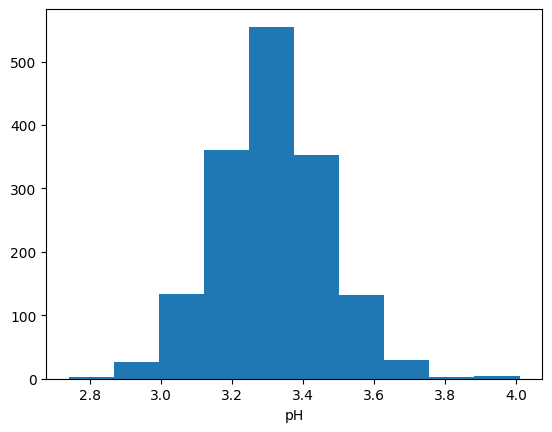

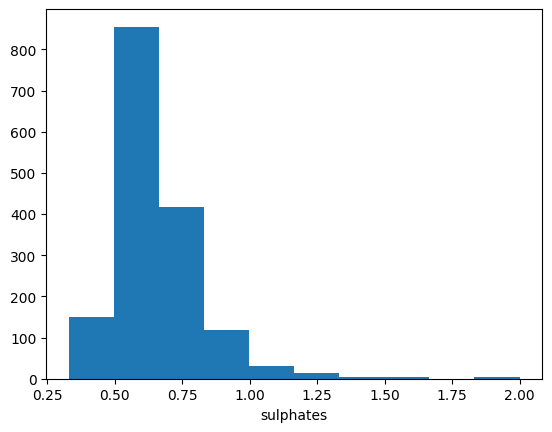

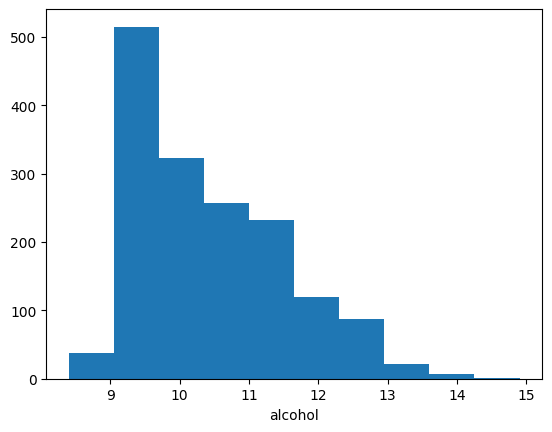

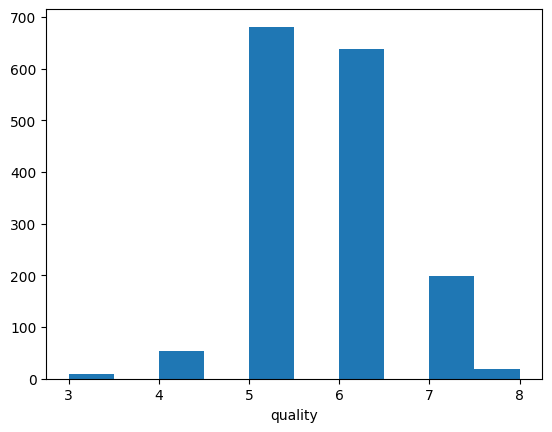

In [5]:
# Plot Histogram
for i in RED.columns.values:
  plt.hist(RED[i])
  plt.xlabel(i)
  plt.show()

Except for quality, all the variables are continuous.

array([[<AxesSubplot:xlabel='fixed acidity', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='citric acid', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='residual sugar', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='chlorides', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='density', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='pH', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='sulphates', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='alcohol', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='quality', ylabel='fixed acidity'>],
       [<AxesSubplot:xlabel='fixed acidity', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='cit

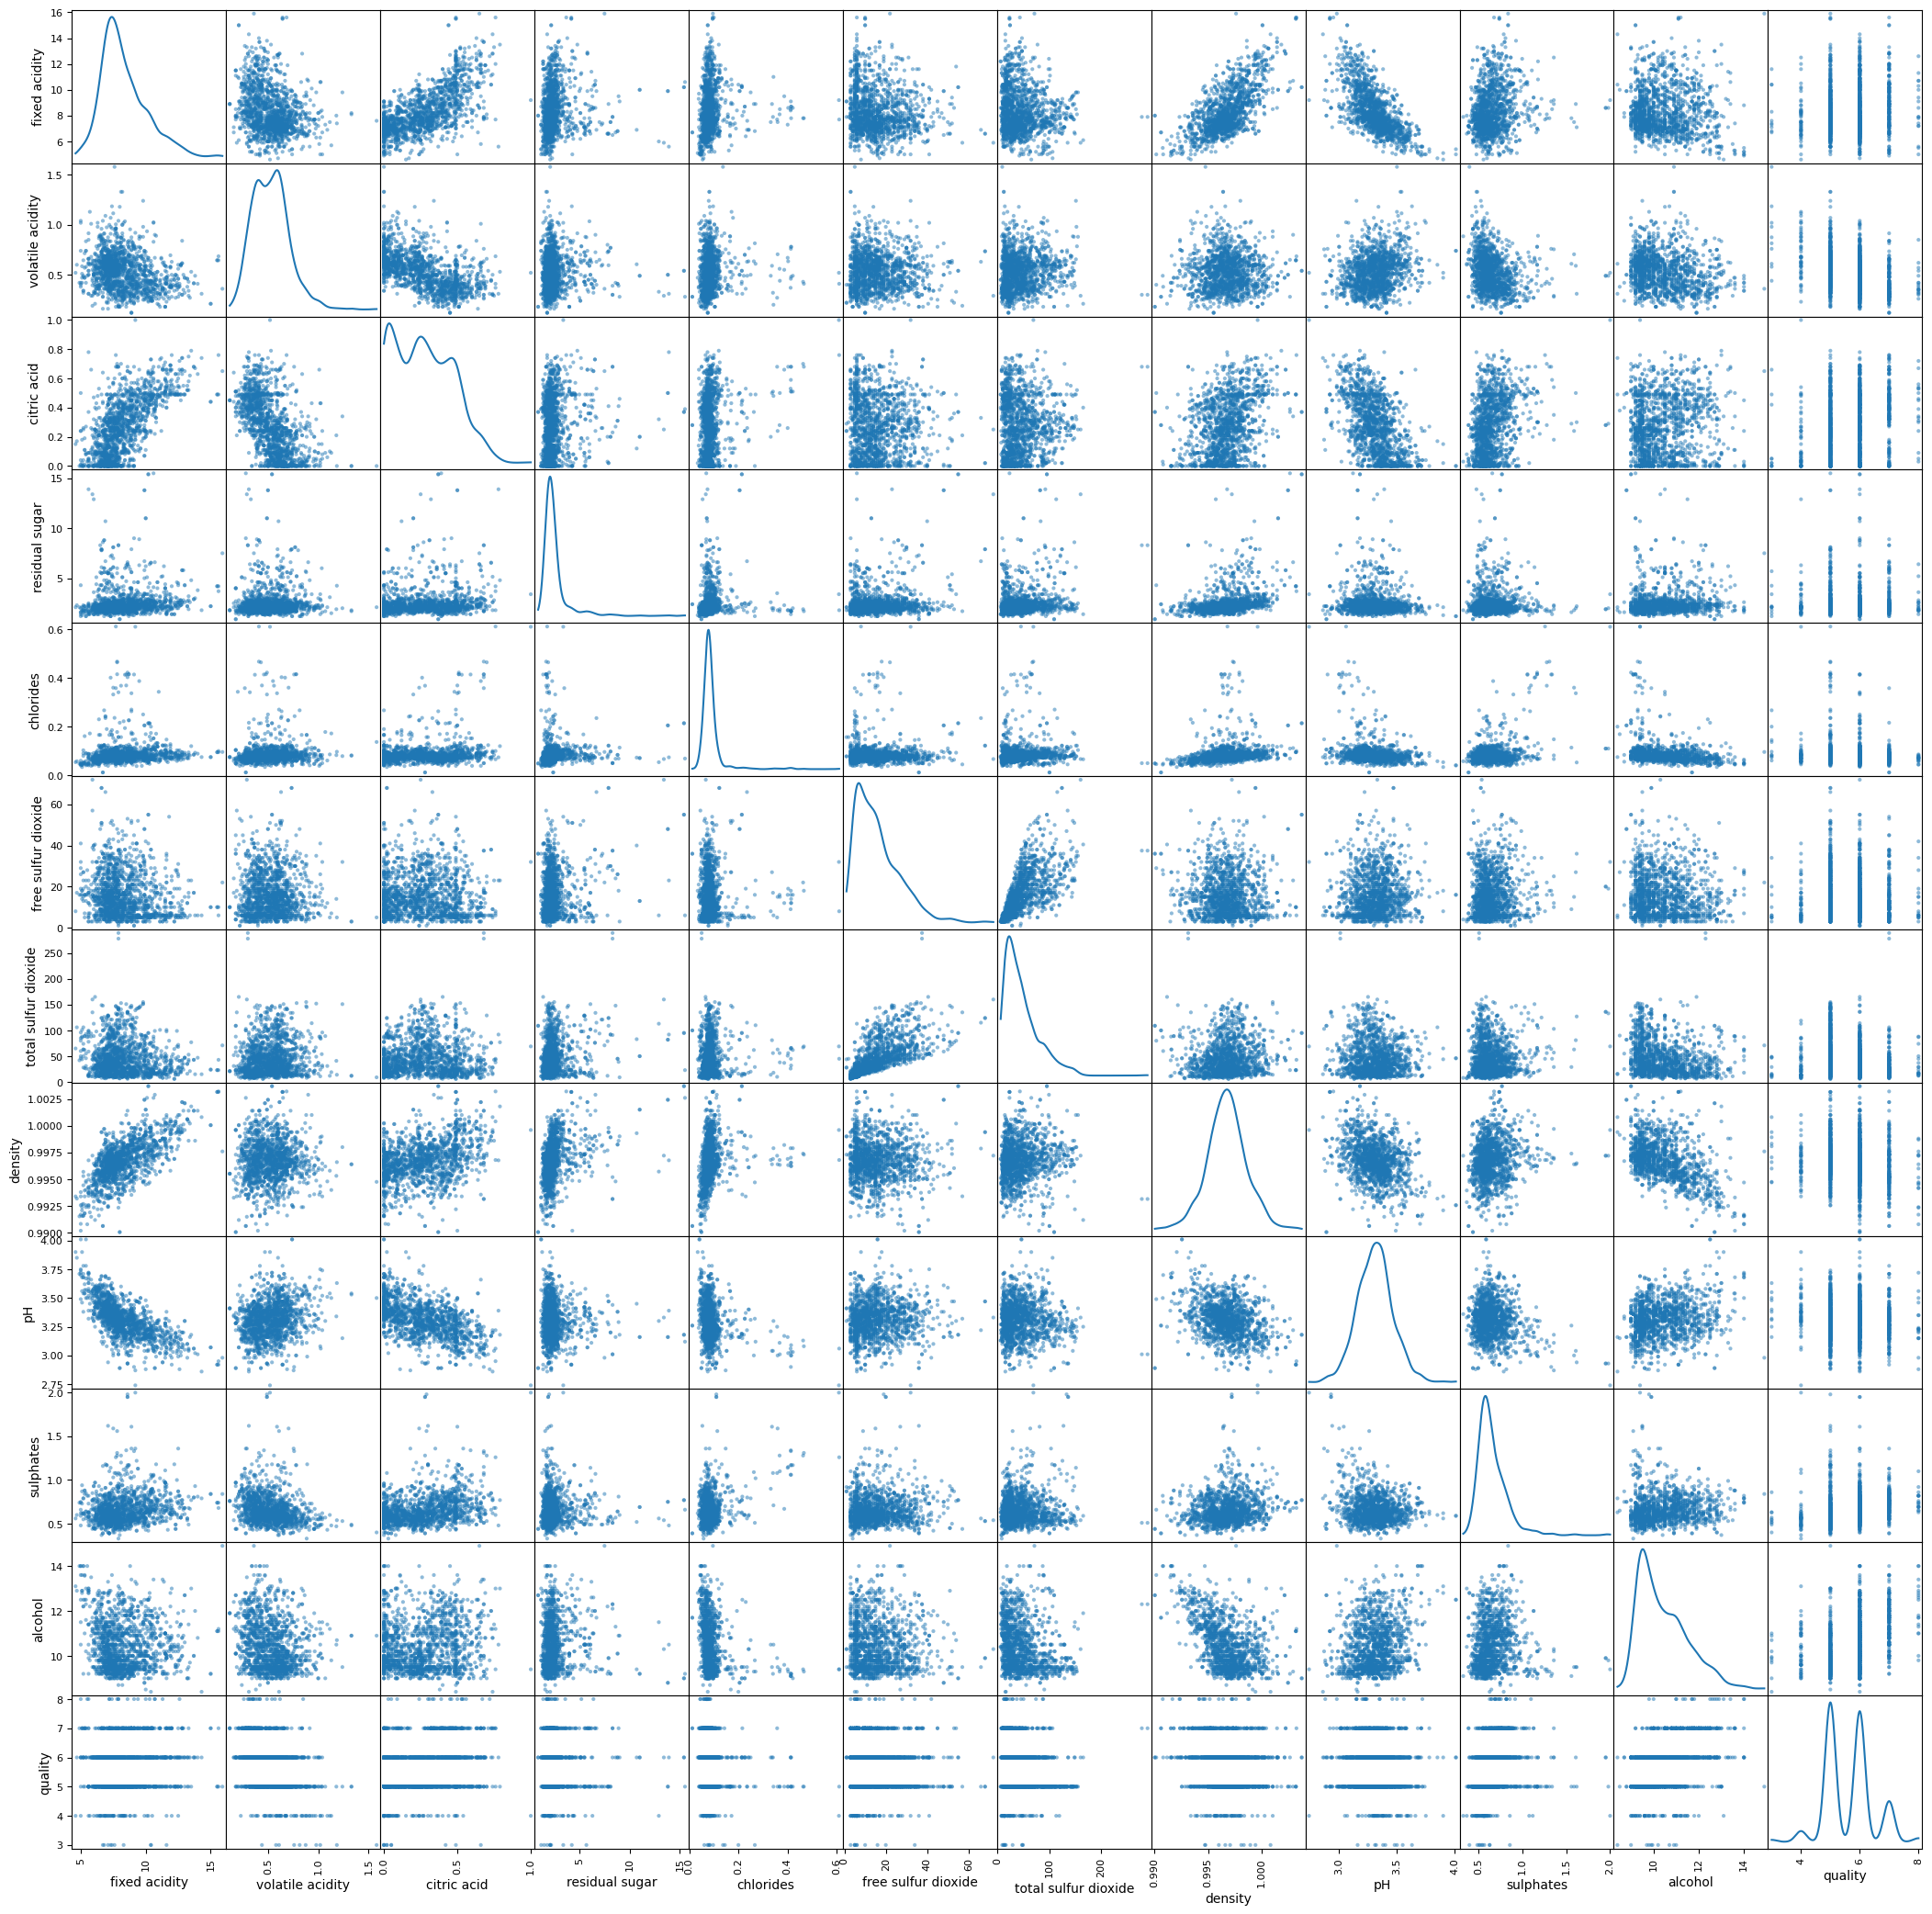

In [6]:
# Plot Pair Wise Scatter Matrix(DATA VISUALISATION)
pd.plotting.scatter_matrix(RED,alpha=0.5,figsize=(26,26),diagonal="kde") 

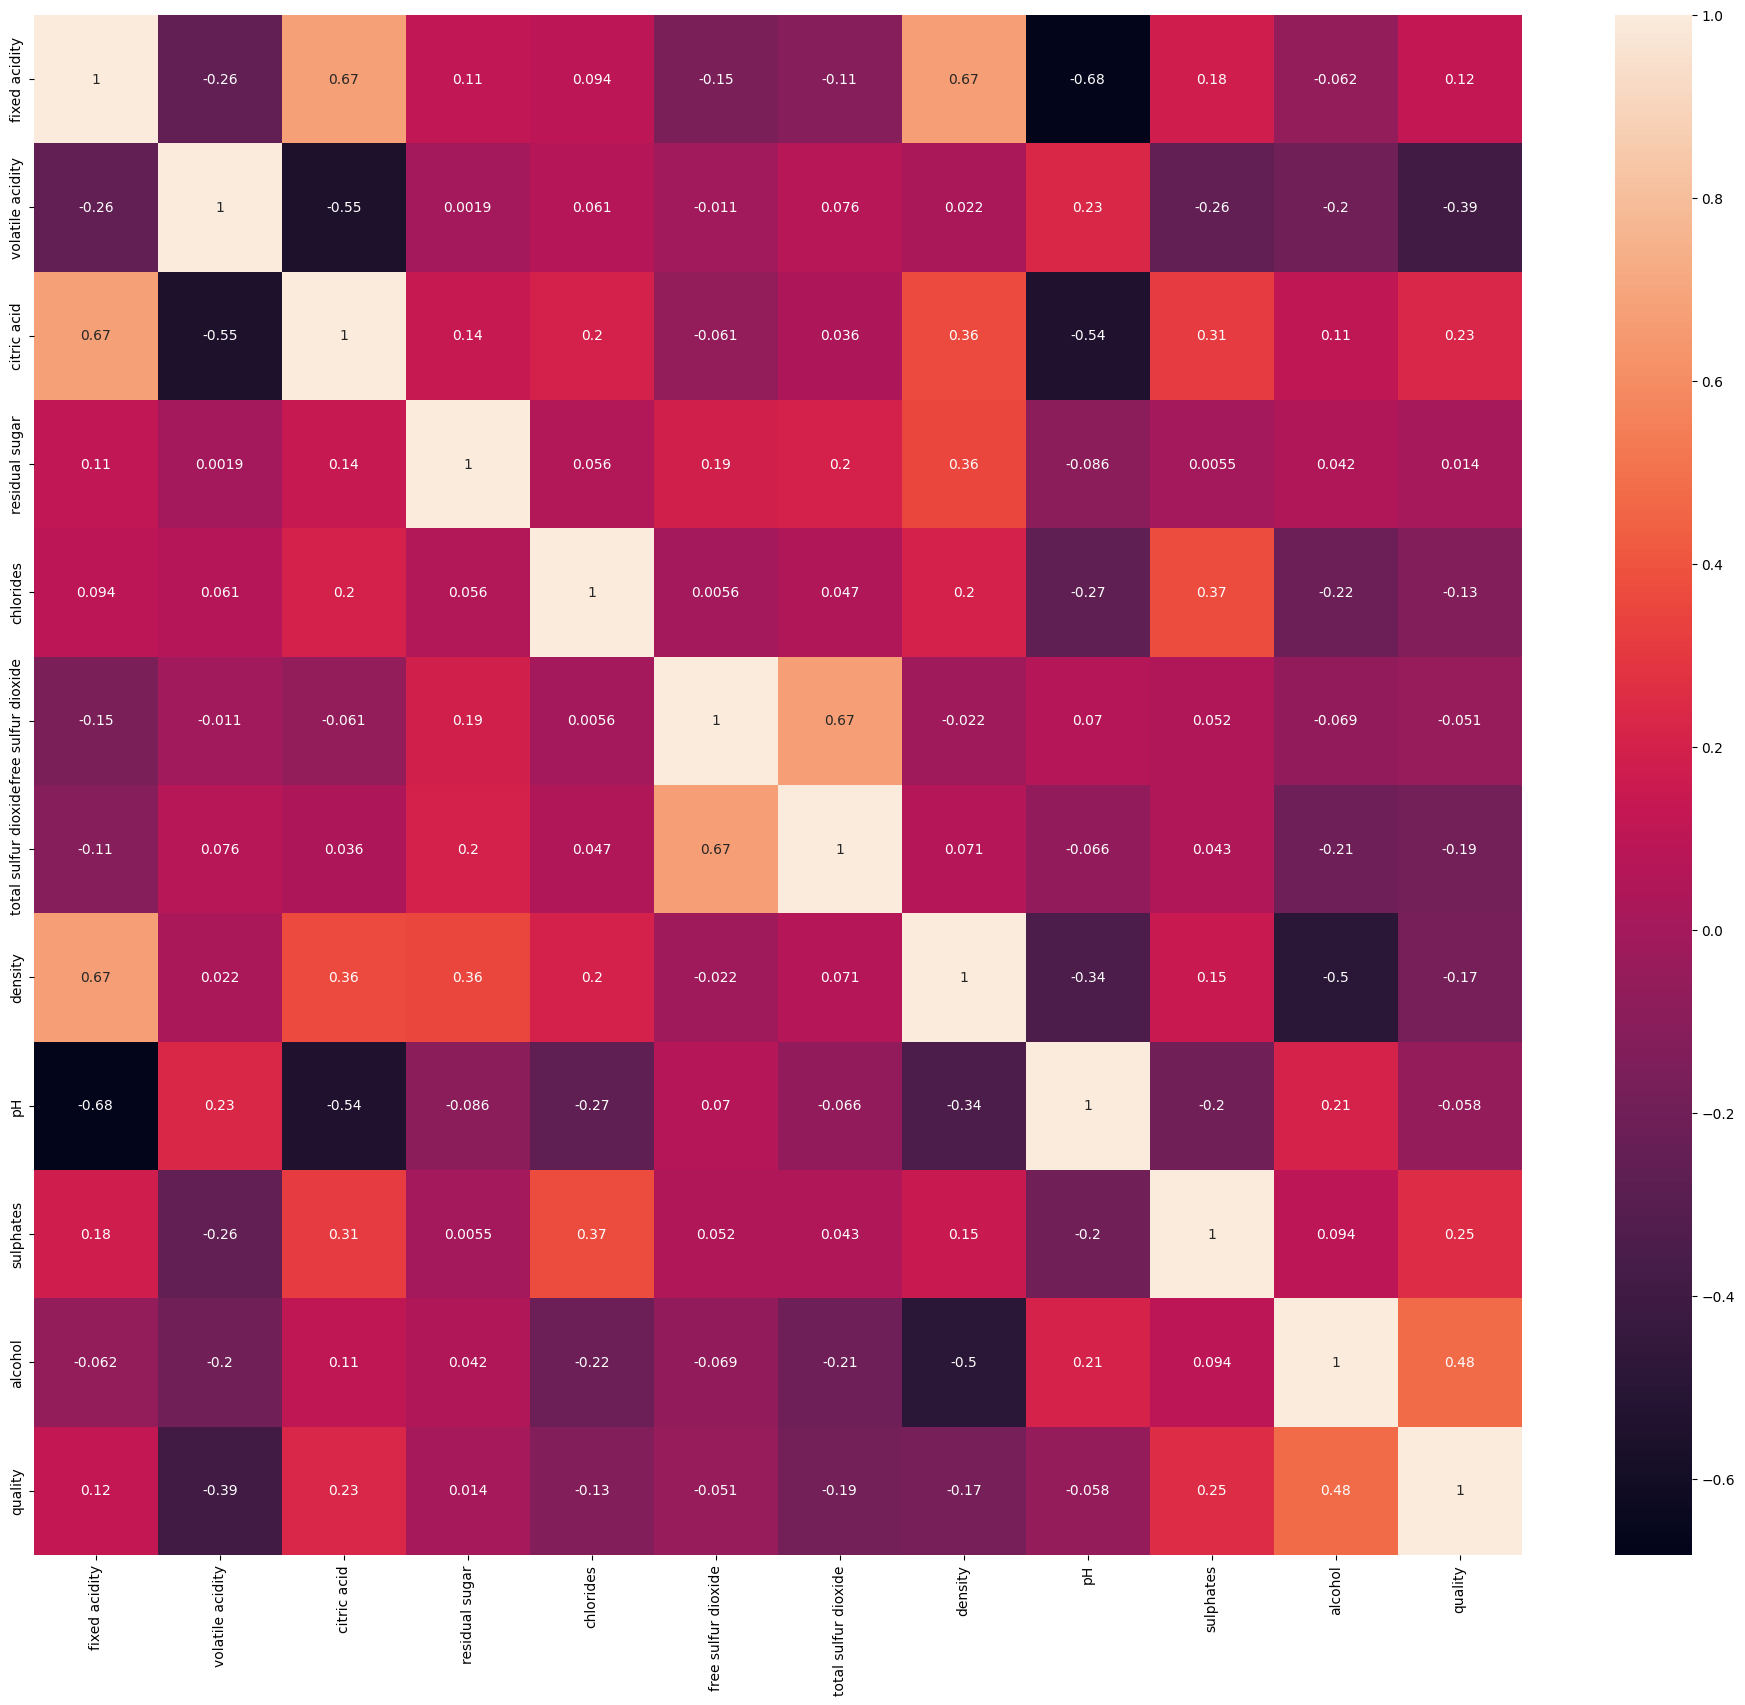

In [7]:
# Check Correlation using HeatMap 
fig, az =plt.subplots(figsize=(24,20))
sns.heatmap(RED.corr(),annot=True)
plt.show()

Here, values in cell represents correlation values.

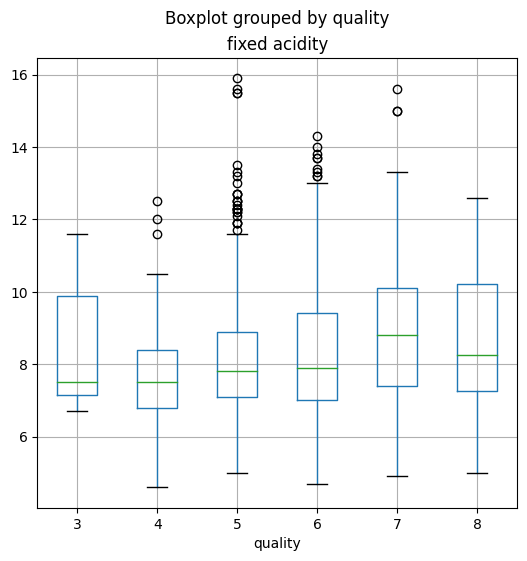

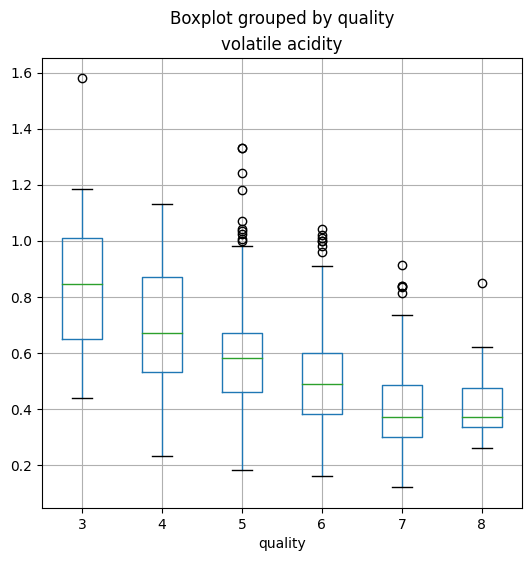

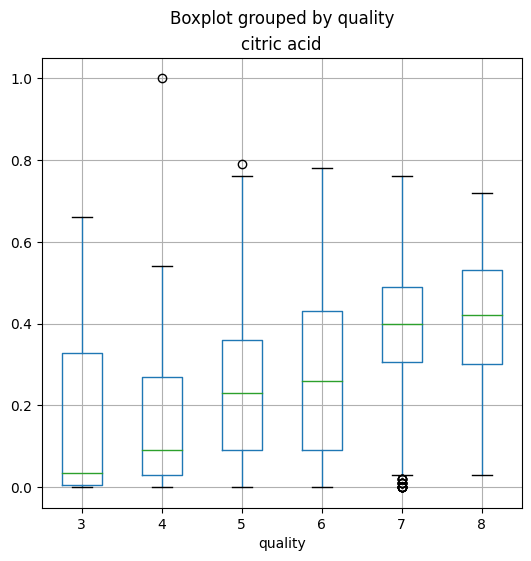

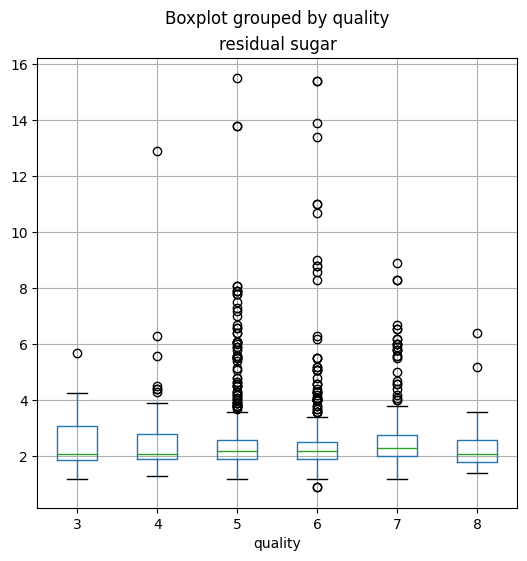

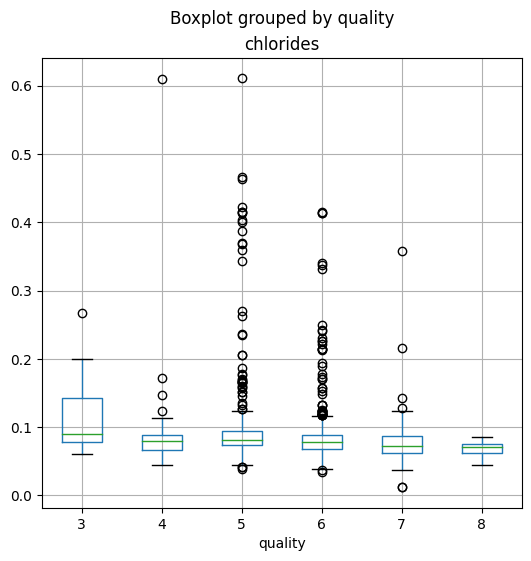

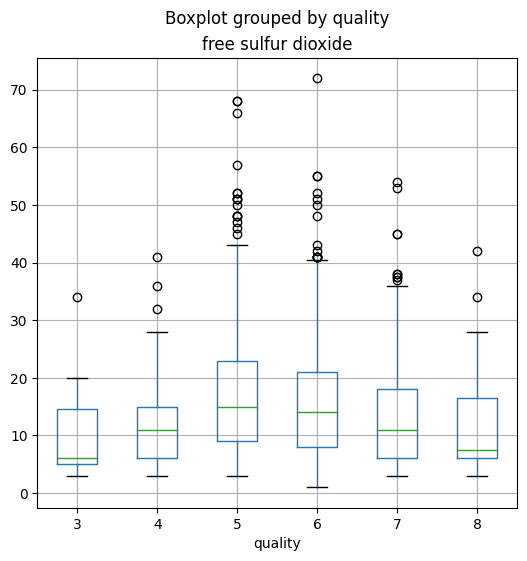

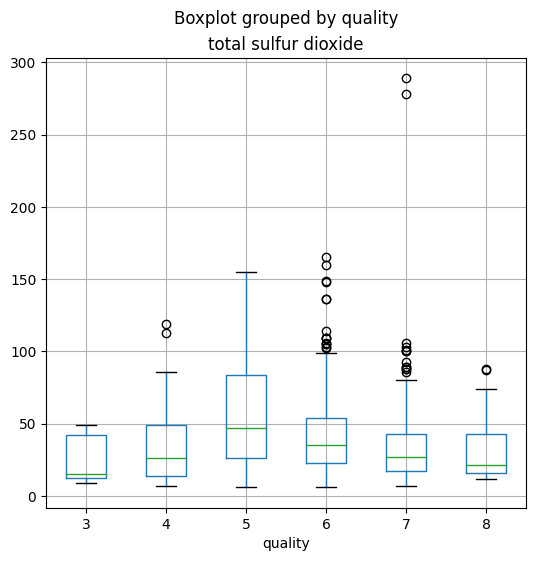

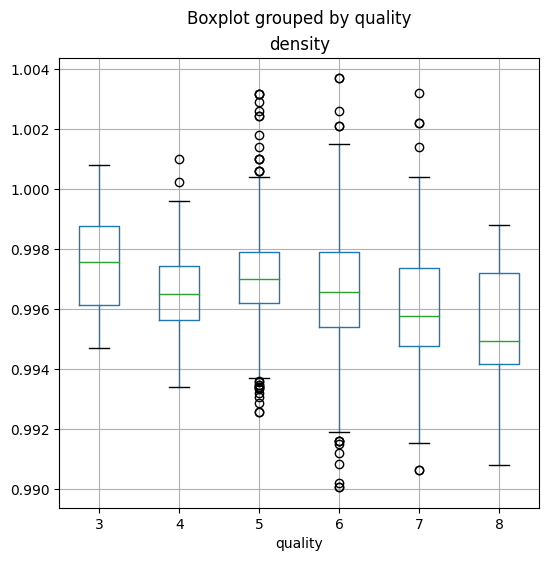

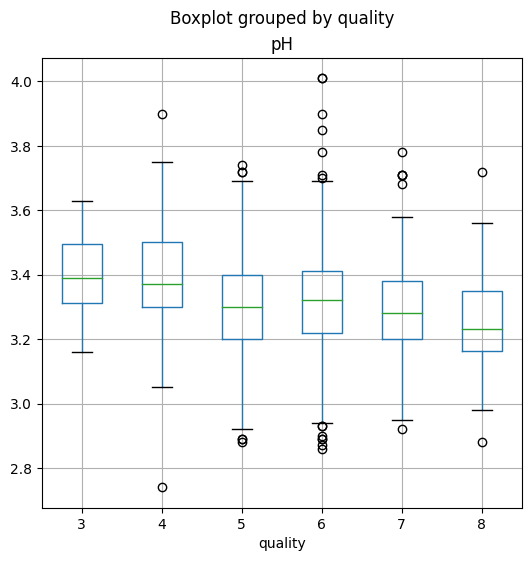

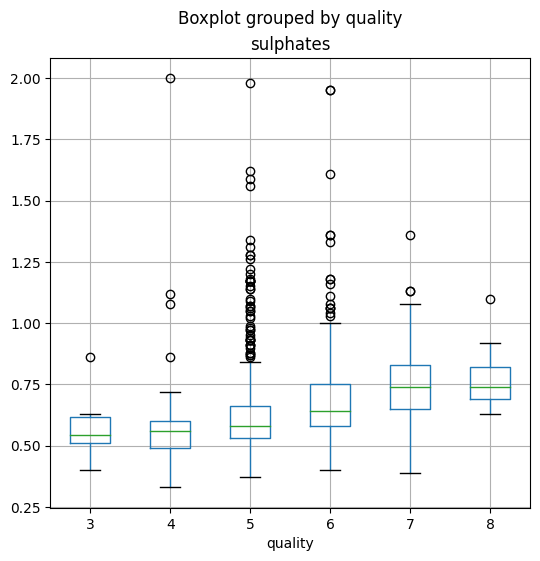

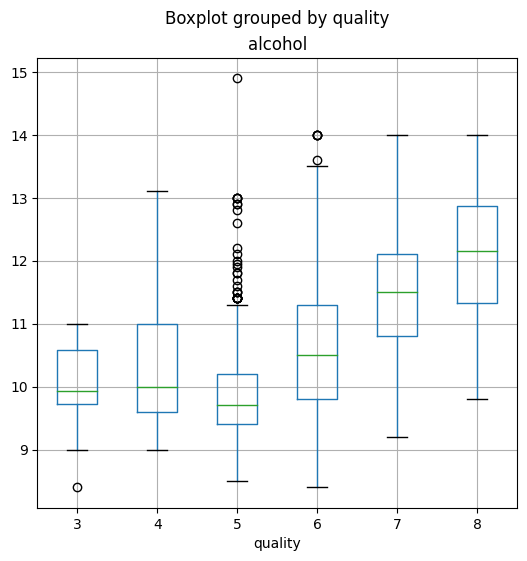

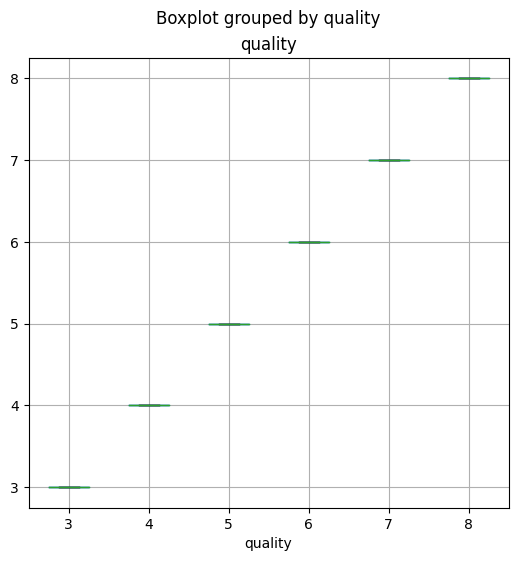

In [8]:
# Box Plot to check for Outliers
for i in RED.columns.values:
  RED.boxplot(column=i,by='quality',grid=True,figsize=(6,6))

All the points outside box plot are outliers.

Now, we need to remove this correlated and outlier points to reduce complexity and improve the model.

In [9]:
# Create correlation matrix
corr_matrix = RED.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop features
RED.drop(to_drop, axis=1, inplace=True)

# code from https://stackoverflow.com/a/52509954, with only necessary naming and value changes

##### Splitting Dataset into TRAIN, VALIDATION AND TEST

In [10]:
# Splitting Target Value(Quality) and Features X--> Input features to Model Y--> Wine Quality Score
X=RED.drop(["quality"],axis=1)
Y=RED["quality"]

In [11]:
# Splitting dataset into 60-20-20 ratio
from sklearn.model_selection import train_test_split
x, x_test, y, y_test = train_test_split(X,Y,test_size=0.2,train_size=0.8)
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size = 0.25,train_size =0.75)

#### Preprocessing

In [12]:
# Scale the features to have zero mean and unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

### **RandomForest**

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from tabulate import tabulate

# Hyperparameters which will be varied discretely
max_depth_values = np.linspace(10,60,5)
n_estimators_values = [50,100,200,300,400,500]

# Initialize variables 
results = []

# Loop over each combination of hyperparameters
for max_depth in max_depth_values:
    for n_estimators in n_estimators_values:
        # Initialize the Random Forest model with current hyperparameters
        rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=1)

        # Train the model on the training data
        rf_model.fit(x_train_scaled, y_train)

        # Validate the model on the validation data
        y_val_pred = rf_model.predict(x_val_scaled)

        # Calculate R-squared
        r_squared = r2_score(y_val, y_val_pred)

        # Store results
        results.append([r_squared, max_depth, n_estimators])

# Print the results as a table
print(tabulate(results, headers=['R-squared', 'Max Depth', 'N Estimators'], tablefmt='pretty'))

+---------------------+-----------+--------------+
|      R-squared      | Max Depth | N Estimators |
+---------------------+-----------+--------------+
| 0.48943250520542425 |   10.0    |      50      |
| 0.48612347823643265 |   10.0    |     100      |
| 0.48650558434869307 |   10.0    |     200      |
| 0.48643686398058694 |   10.0    |     300      |
| 0.48594077404330904 |   10.0    |     400      |
| 0.4829628961149429  |   10.0    |     500      |
| 0.5077746328732979  |   22.5    |      50      |
| 0.5041094184500521  |   22.5    |     100      |
| 0.4999355697448724  |   22.5    |     200      |
| 0.5014174247681136  |   22.5    |     300      |
|  0.50180451878188   |   22.5    |     400      |
| 0.49814944836744957 |   22.5    |     500      |
| 0.5088402046514264  |   35.0    |      50      |
| 0.5048274493686133  |   35.0    |     100      |
| 0.4998227299139727  |   35.0    |     200      |
| 0.5014673110446577  |   35.0    |     300      |
| 0.5018102297368159  |   35.0 

In [14]:
# Finding the hyperparamters which give best model (higher R2 score => Better model)
best_r_squared = -float('inf')
best_max_depth = None
best_n_estimators = None

# Loop through the results to find the best R-squared and its corresponding hyperparameters
for r_squared, max_depth, n_estimators in results:
    if r_squared > best_r_squared:
        best_r_squared = r_squared
        best_max_depth = max_depth
        best_n_estimators = n_estimators
      
# Train the final model with the best hyperparameters on the entire training set
final_rf_model = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
final_rf_model.fit(x_train_scaled, y_train)

# Test the final model on the test data
y_test_pred = final_rf_model.predict(x_test_scaled)

# Calculate test R-squared
test_r_squared_rf = r2_score(y_test, y_test_pred)
print(f"Test R-squared: {test_r_squared_rf}")

Test R-squared: 0.44457882774295765


##### Feature Importance

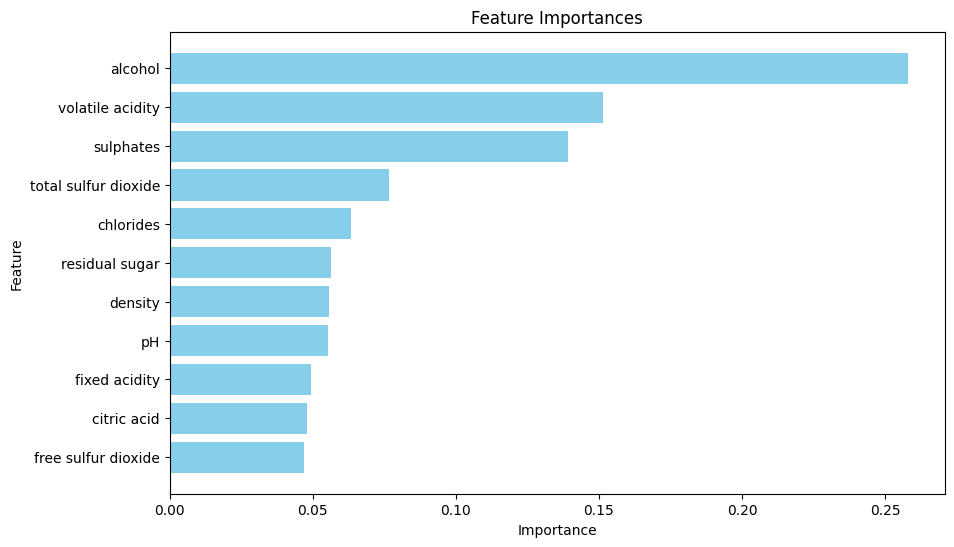

In [15]:
# Get feature importances from the final model
feature_importances = final_rf_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to show most important features at the top
plt.show()

#Above code is taken from ChatGPT

We can thus see that **alcohol** is the most important feature for this model.

### **Support vector regression with RBF kernel**

In [16]:
from sklearn.svm import SVR

# Range of hyperparameters to try
param_C= [0.01,0.1, 1, 10, 100]  # Varying the C parameter
param_gamma= ['scale', 'auto'] # Varying gamma parameter

# Initialize variables 
results = []

# Iterate over each combination of hyperparameters
for C in param_C:
    for gamma in param_gamma:
        # Train the SVR model with RBF kernel
        svr_model = SVR(kernel='rbf', C=C, gamma=gamma)
        svr_model.fit(x_train_scaled, y_train)
        
        # Validate the SVR model on the validation data
        y_val_pred = svr_model.predict(x_val_scaled)
        
        # Calculate R-squared
        r_squared = r2_score(y_val, y_val_pred)

        # Store results
        results.append([r_squared, C, gamma])

# Print the results as a table
print(tabulate(results, headers=['R-squared', 'C', 'GAMMA'], tablefmt='pretty'))

+---------------------+------+-------+
|      R-squared      |  C   | GAMMA |
+---------------------+------+-------+
| 0.23717886750131056 | 0.01 | scale |
| 0.23717886750131056 | 0.01 | auto  |
| 0.33075446861475555 | 0.1  | scale |
| 0.33075446861475555 | 0.1  | auto  |
| 0.37050463537717937 |  1   | scale |
| 0.37050463537717937 |  1   | auto  |
| 0.3229866894530111  |  10  | scale |
| 0.3229866894530111  |  10  | auto  |
| 0.09674737095740804 | 100  | scale |
| 0.09674737095740804 | 100  | auto  |
+---------------------+------+-------+


In [17]:
# Finding the hyperparamters which give best model (higher R2 score => Better model)
best_r_squared = -float('inf')
best_C = None
best_gamma = None

# Loop through the results to find the best R-squared and its corresponding hyperparameters
for r_squared, C, gamma in results:
    if r_squared > best_r_squared:
        best_r_squared = r_squared
        best_C = C
        best_gamma = gamma

# Train the final model with the best hyperparameters on the entire training set
final_svr_model = SVR(kernel='rbf', C=best_C, gamma=best_gamma)
final_svr_model.fit(x_train_scaled, y_train)

# Test the final model on the test data
y_test_pred = final_svr_model.predict(x_test_scaled)

# Calculate test R-squared
test_r_squared_svr = r2_score(y_test, y_test_pred)
print(f"Test R-squared: {test_r_squared_svr}")

Test R-squared: 0.38447122483289775


#### Feature Importance

To determine the importance of each variable in the SVR models, we can't directly use feature importances as we do in tree-based models like Random Forest. However, we can assess the importance indirectly by using permutation importance. Permutation importance evaluates the importance of each feature by measuring how much a model's performance decreases when the values of that feature are randomly shuffled. Features causing larger performance drops are considered more important, providing insights into which features are most influential for the model's predictions.

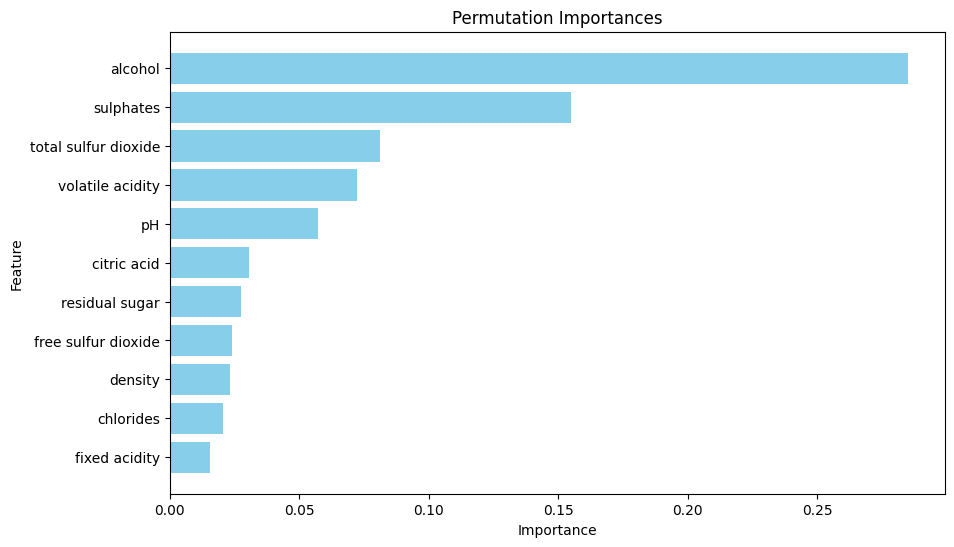

In [18]:
from sklearn.inspection import permutation_importance
# Calculate permutation importances
perm_importance = permutation_importance(final_svr_model, x_test_scaled, y_test, n_repeats=30, random_state=42)

# Get feature names
feature_names = X.columns

# Plot permutation importances
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Permutation Importances')
plt.show()

Thus we can see that **alcohol** is the most important feature for this model.

In [19]:
results = pd.DataFrame({
    'Model': ['Random Forest','SVR With RBF Kernel'],
    'Score': [test_r_squared_rf, test_r_squared_svr]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

Model
Score                        
0.444579        Random Forest
0.384471  SVR With RBF Kernel

## **WHITE WINE QUALITY**

In [20]:
# Downloading white wine quality file
link='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
WHITE=pd.read_csv(link,sep=";")

# View Head of WHITE dataset
WHITE.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [21]:
# View Tail of WHITE dataset
WHITE.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6

In [22]:
# Check for NULL Entries
WHITE.notnull().all()

fixed acidity           True
volatile acidity        True
citric acid             True
residual sugar          True
chlorides               True
free sulfur dioxide     True
total sulfur dioxide    True
density                 True
pH                      True
sulphates               True
alcohol                 True
quality                 True
dtype: bool

Hence, there is no null entry.

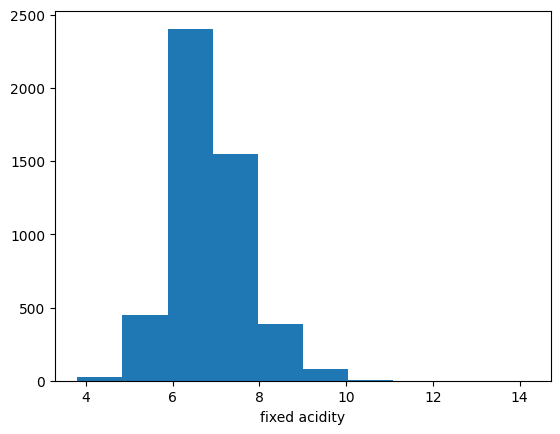

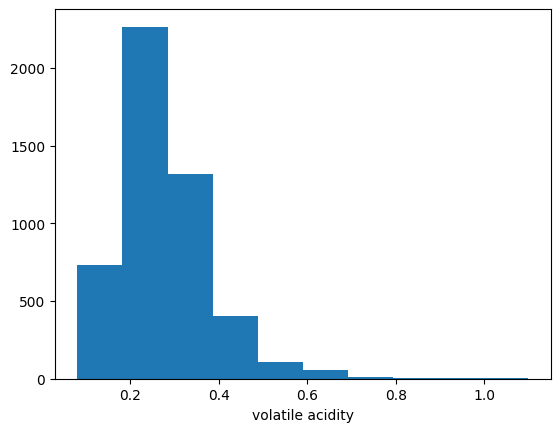

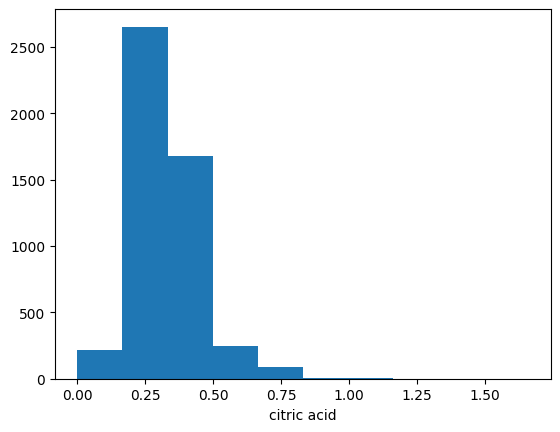

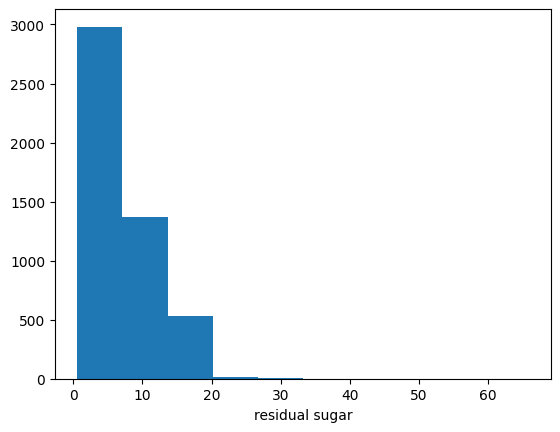

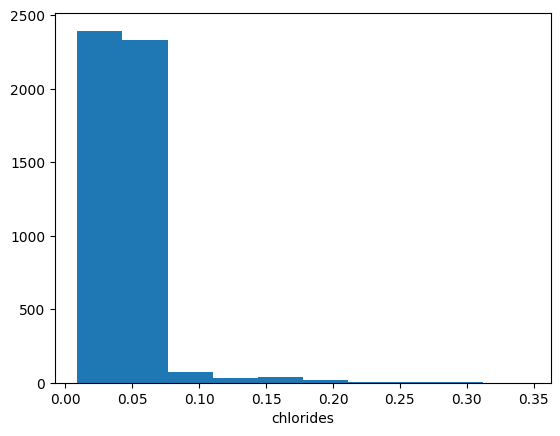

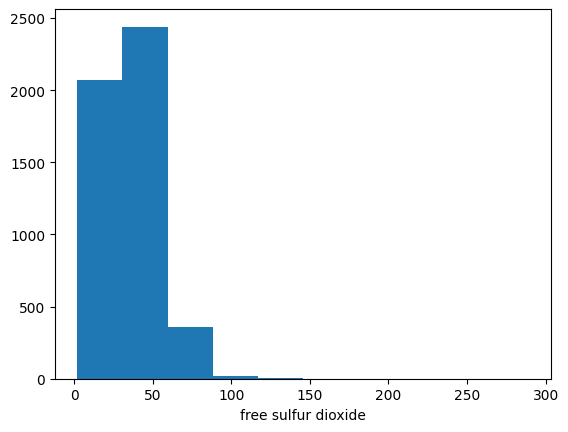

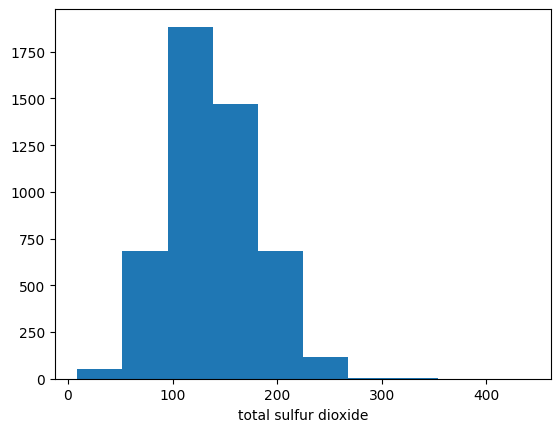

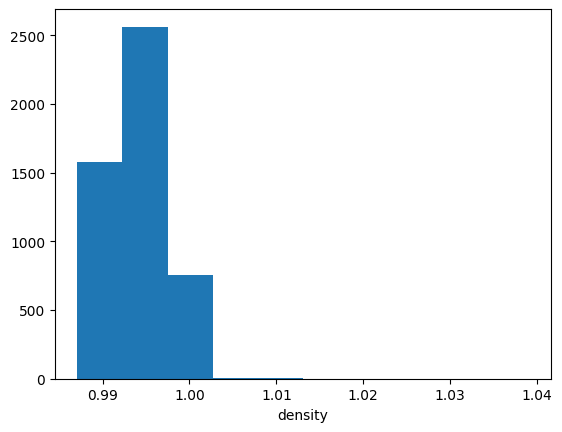

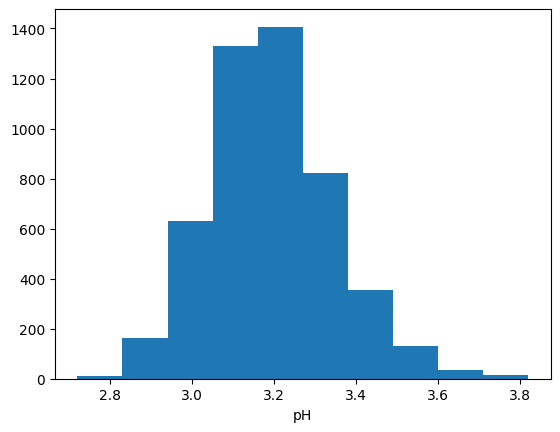

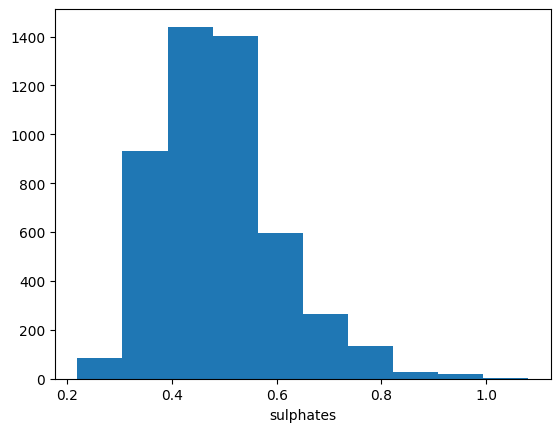

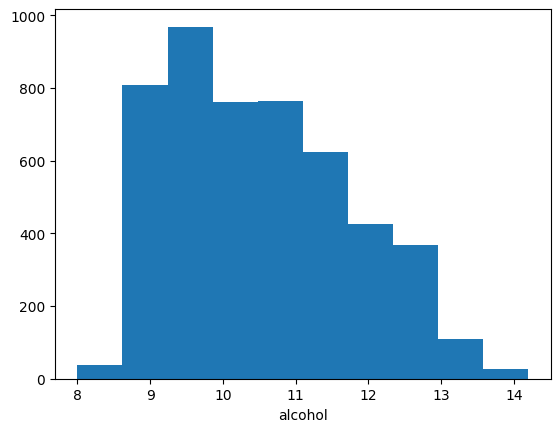

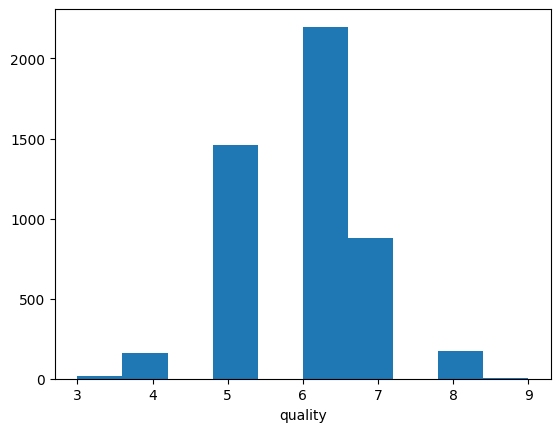

In [23]:
# Plot Histogram
for i in WHITE.columns.values:
  plt.hist(WHITE[i])
  plt.xlabel(i)
  plt.show()

Except for quality, all are continuous variables.

array([[<AxesSubplot:xlabel='fixed acidity', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='citric acid', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='residual sugar', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='chlorides', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='density', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='pH', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='sulphates', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='alcohol', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='quality', ylabel='fixed acidity'>],
       [<AxesSubplot:xlabel='fixed acidity', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='volatile acidity', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='cit

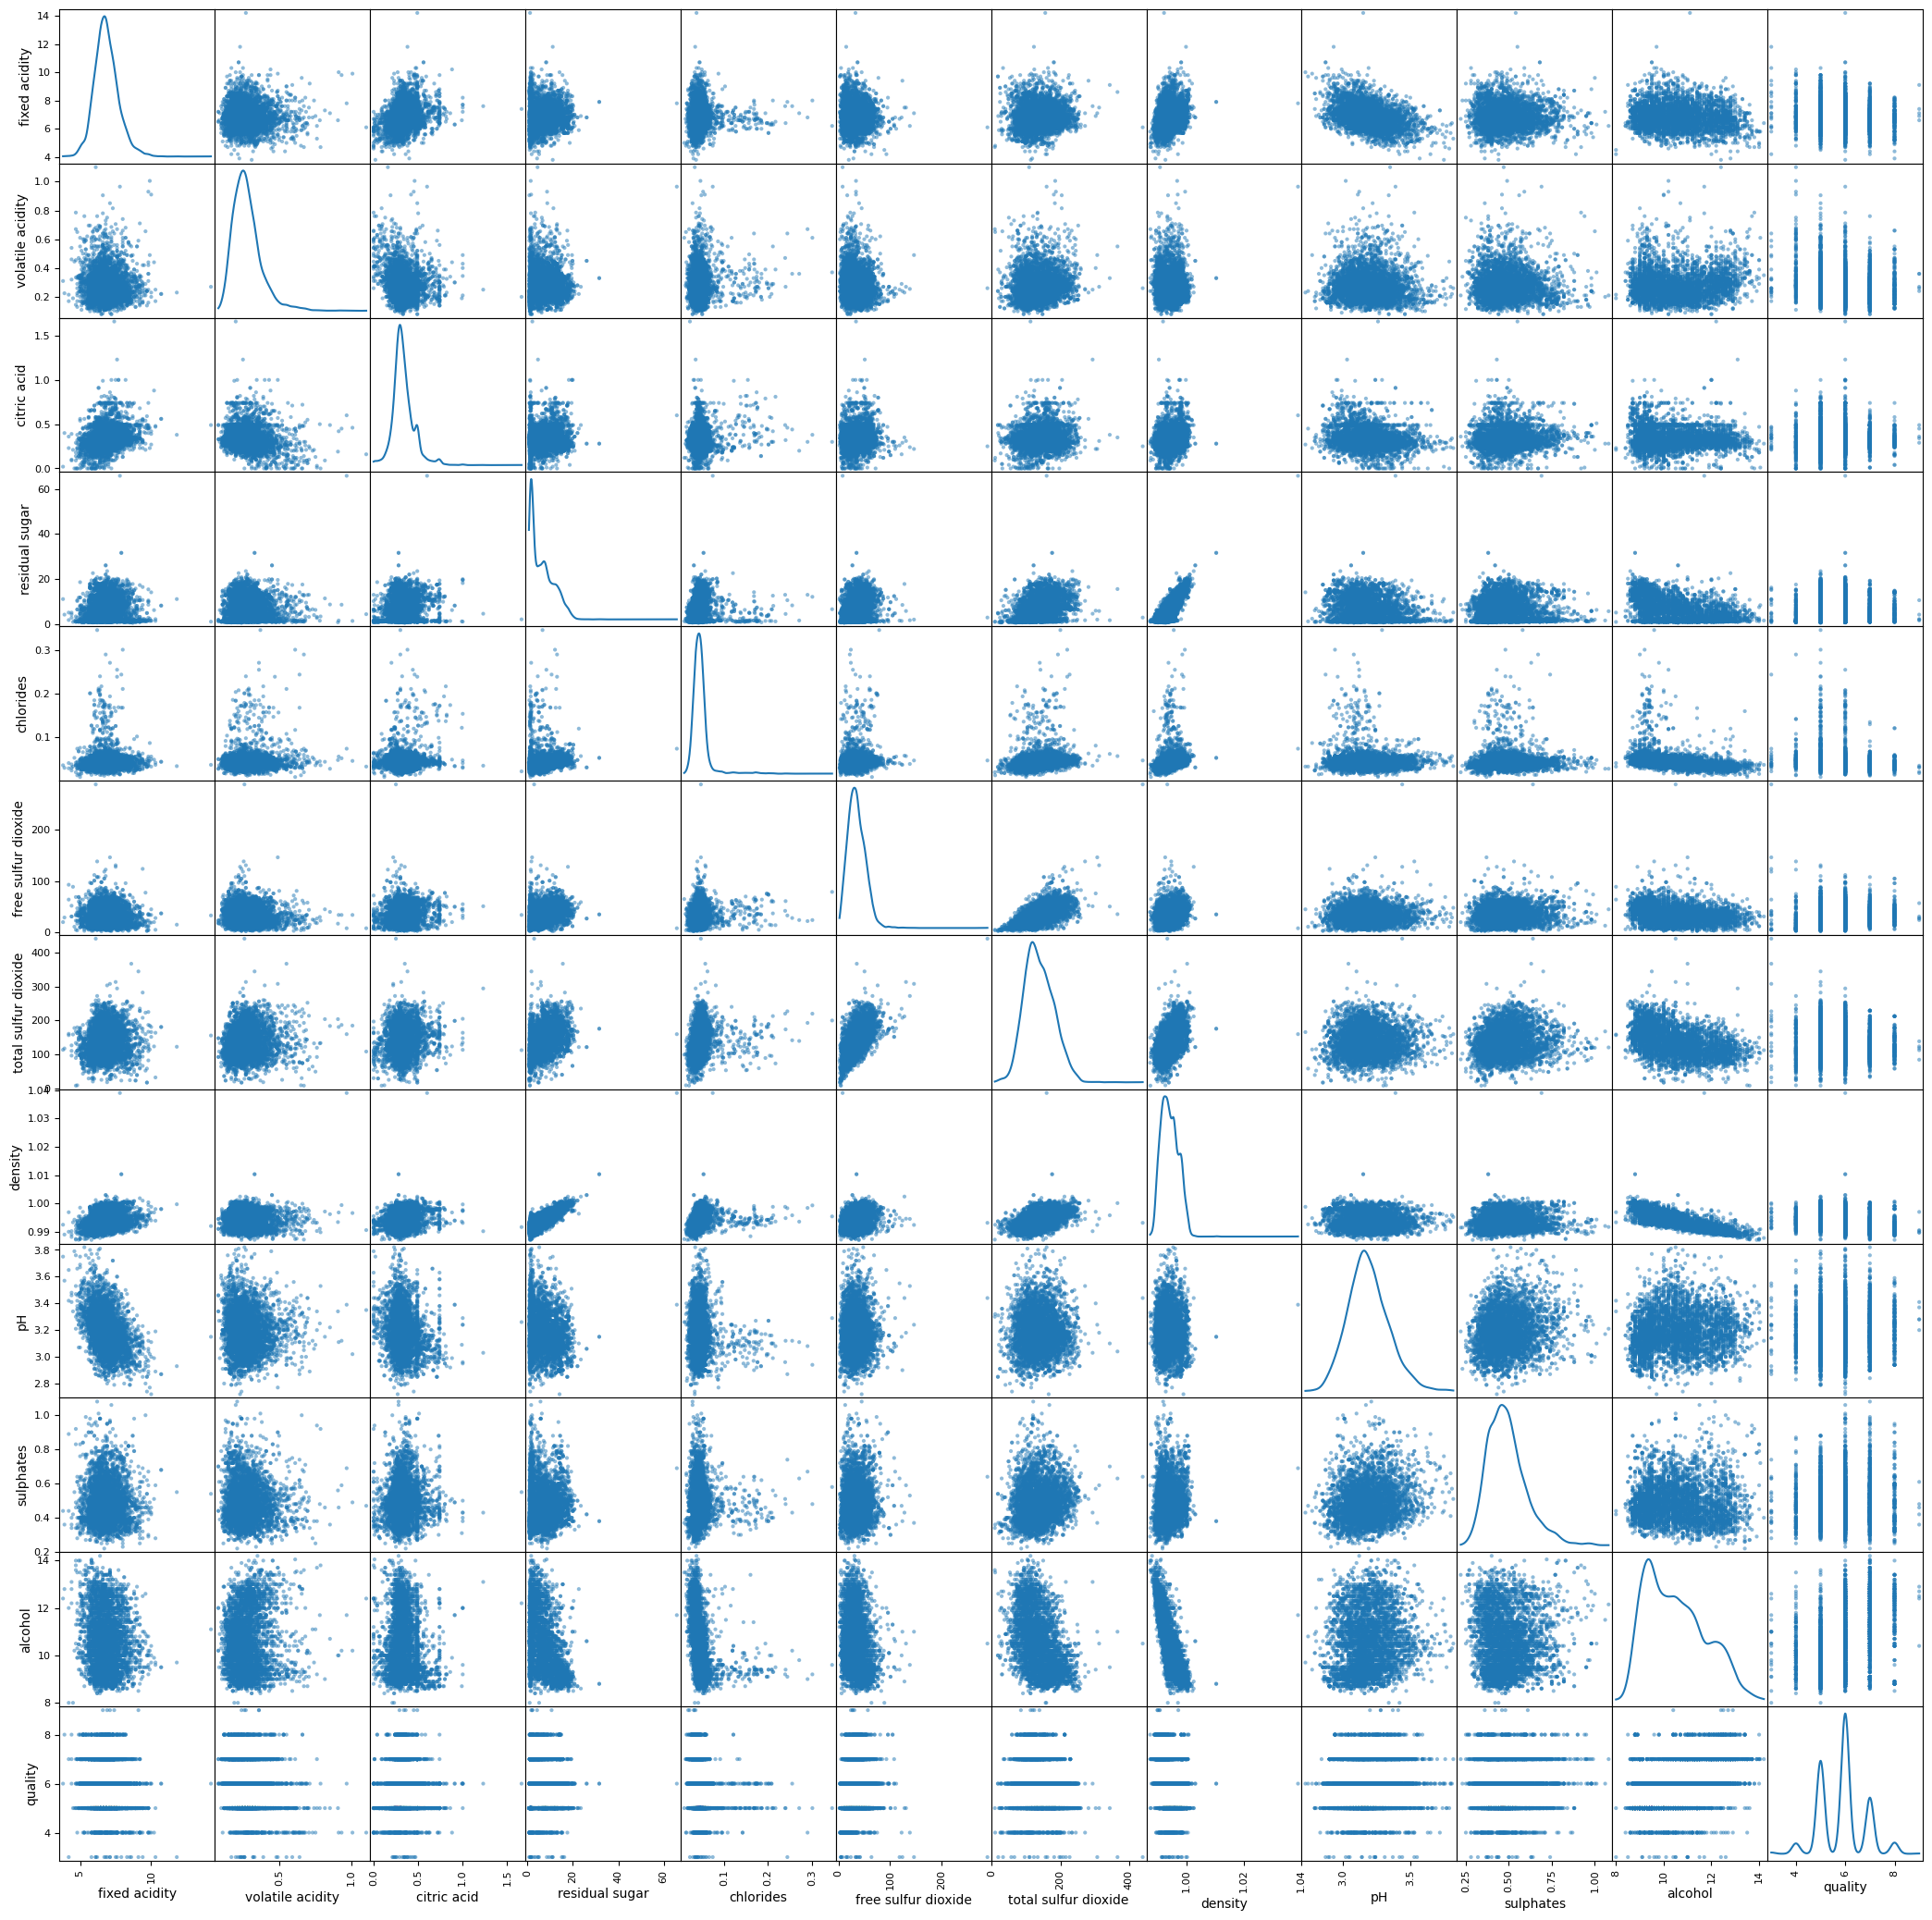

In [24]:
# Plot Pair Wise Scatter Matrix(DATA VISUALISATION)
pd.plotting.scatter_matrix(WHITE,alpha=0.5,figsize=(26,26),diagonal="kde") 

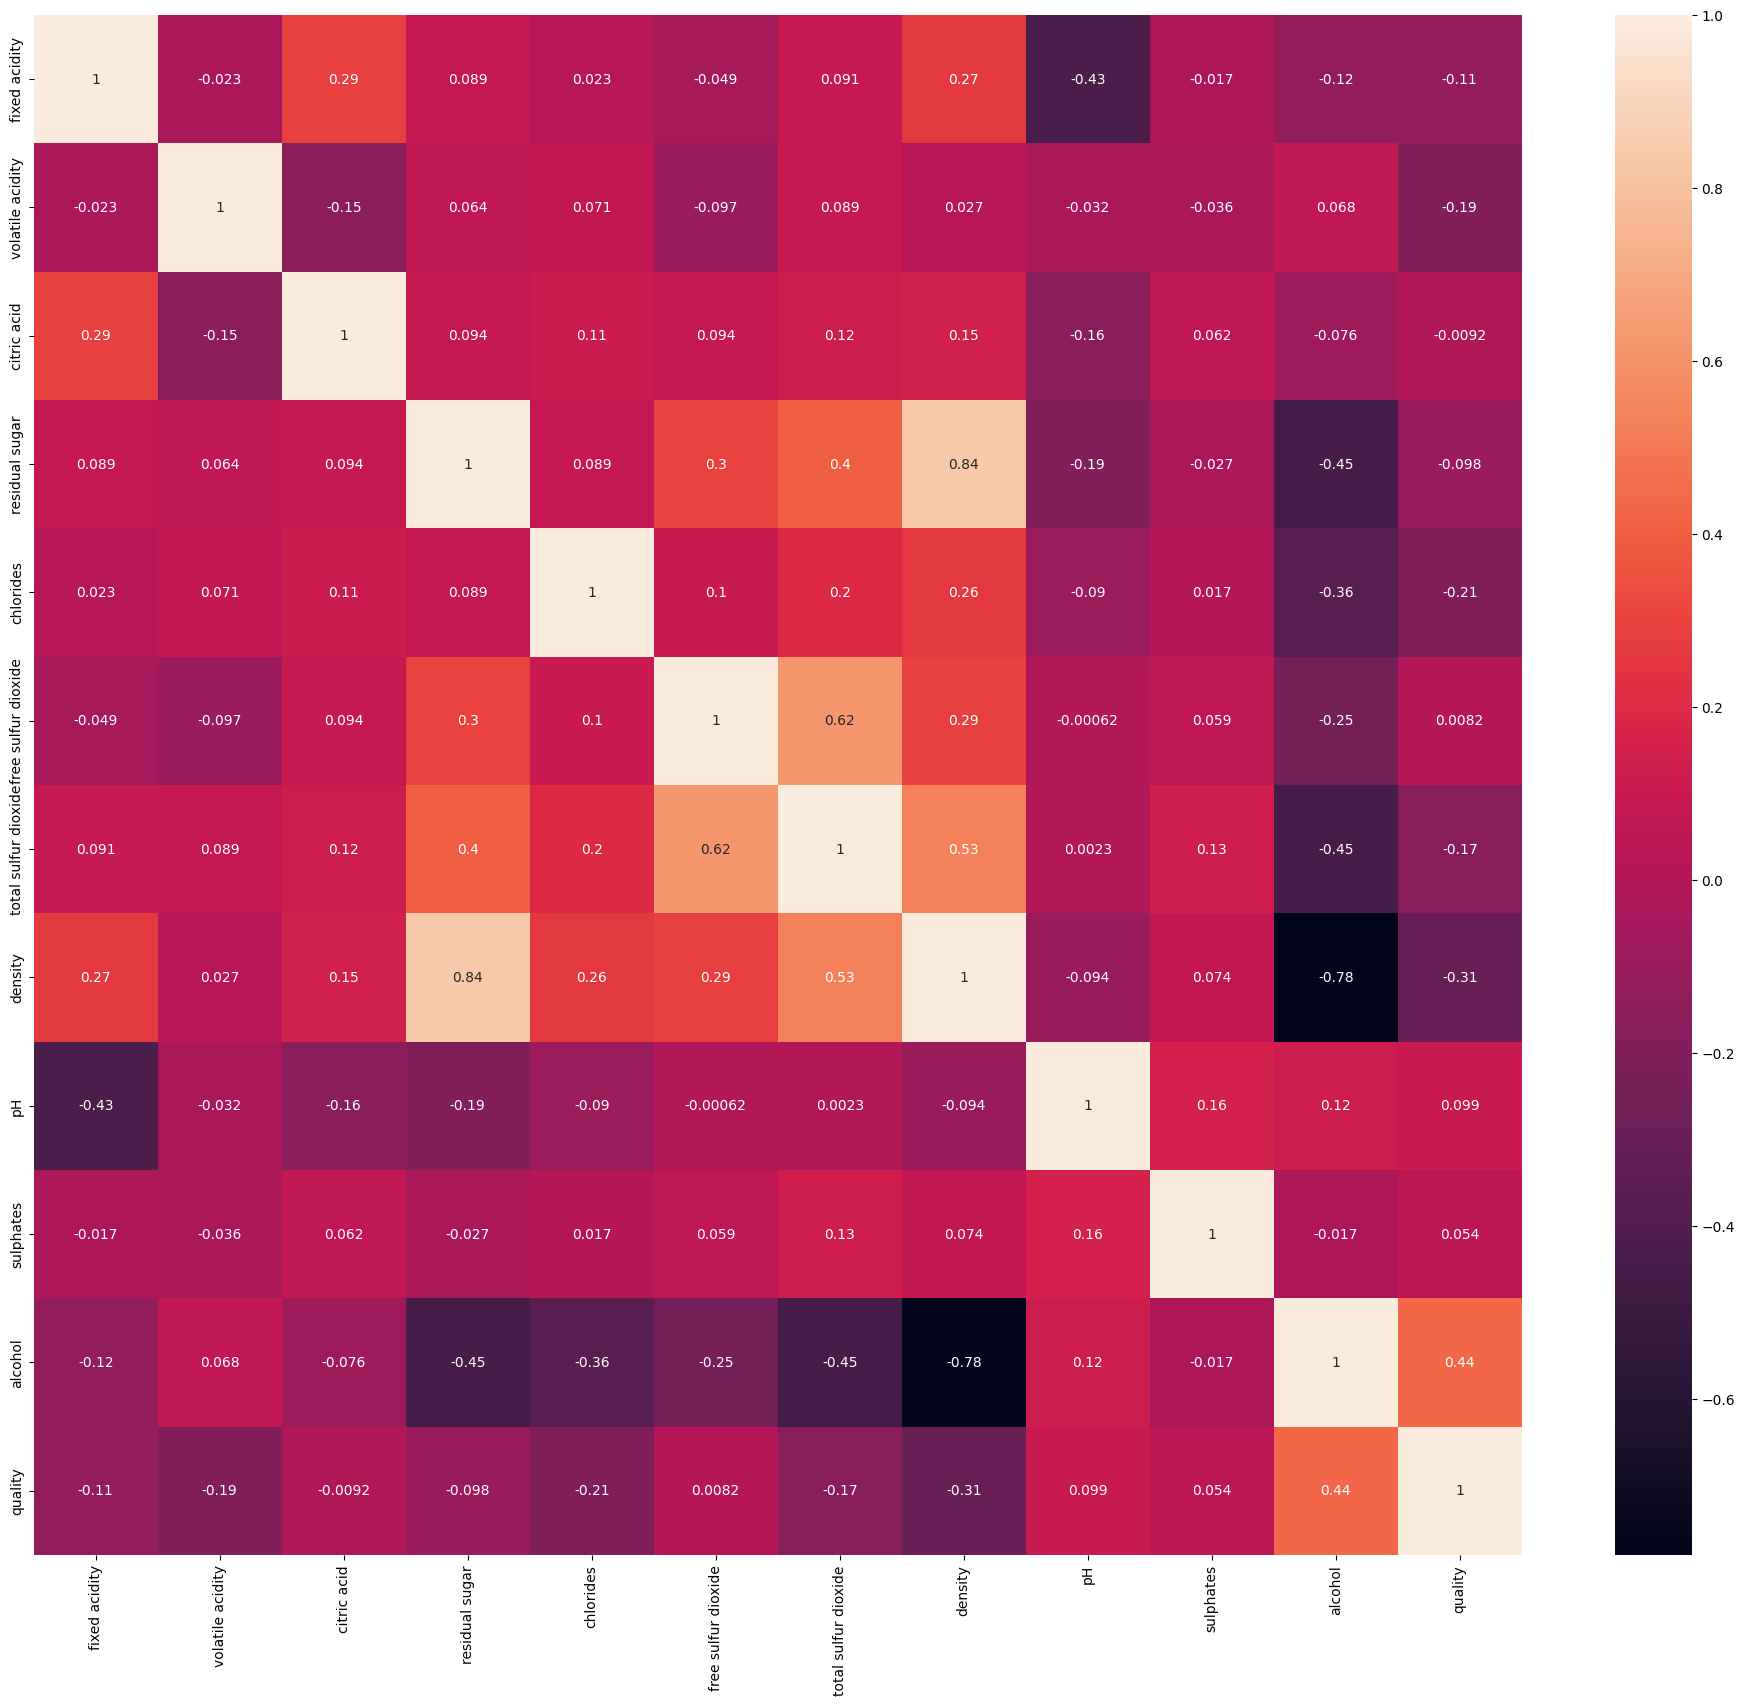

In [25]:
# Check Correlation using HeatMap 
fig, az =plt.subplots(figsize=(24,20))
sns.heatmap(WHITE.corr(),annot=True)
plt.show()

Here, values in cell represent correlation strength.

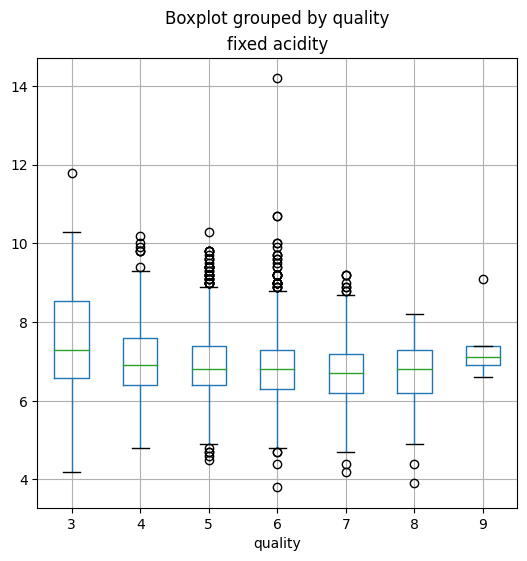

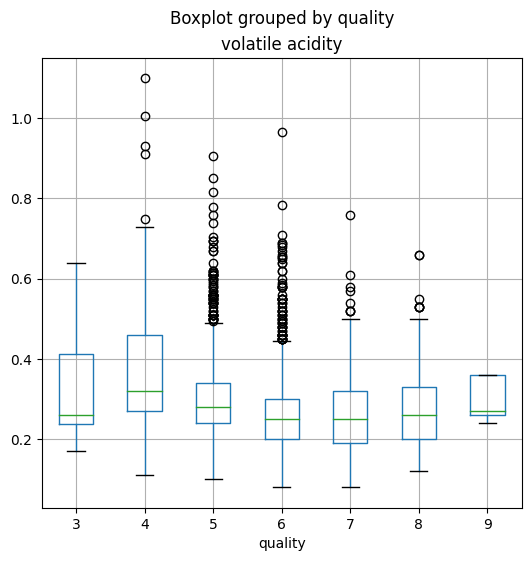

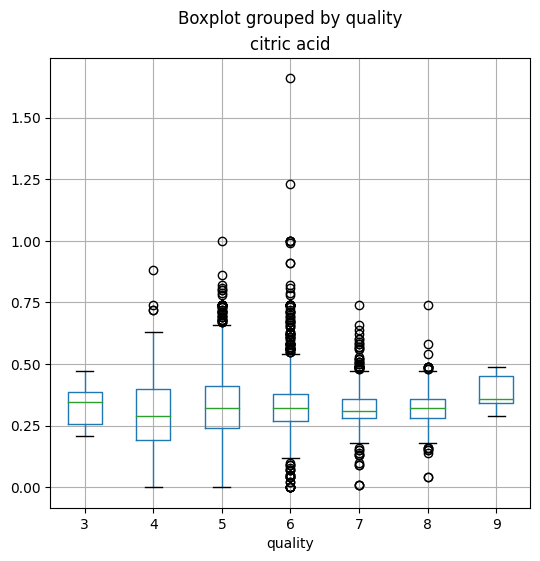

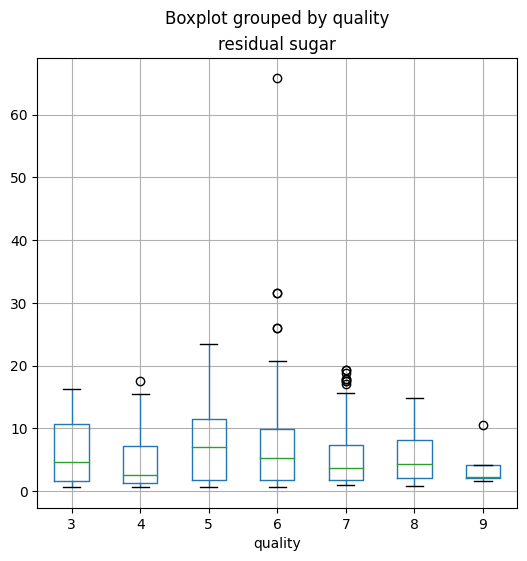

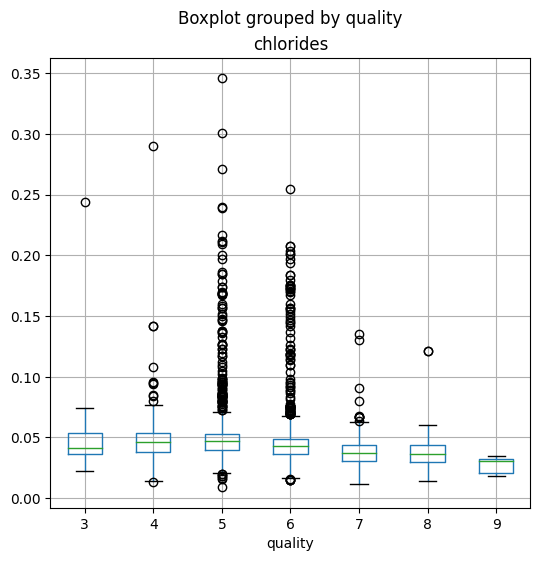

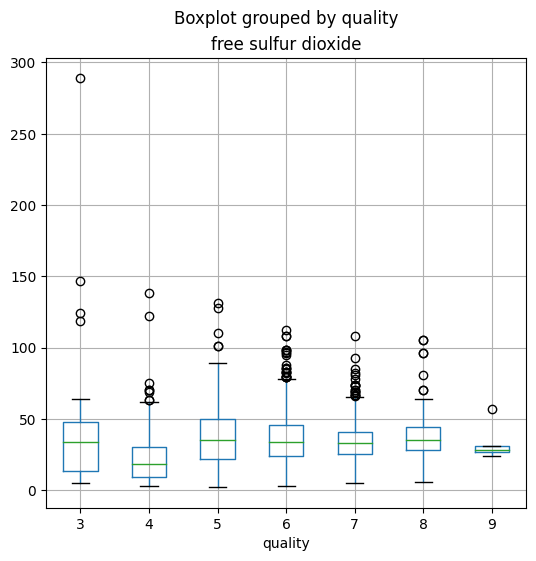

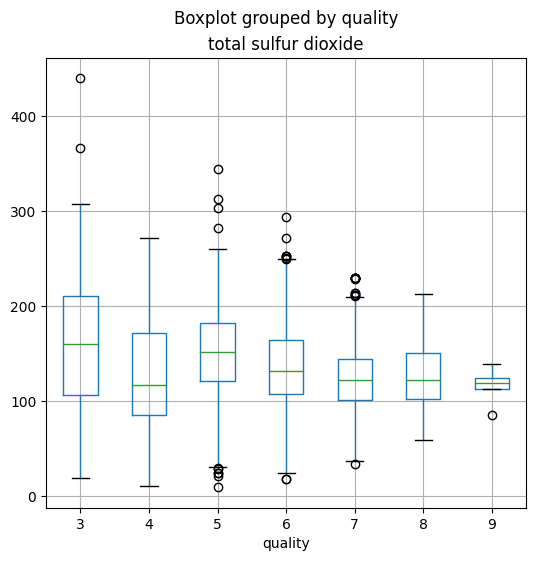

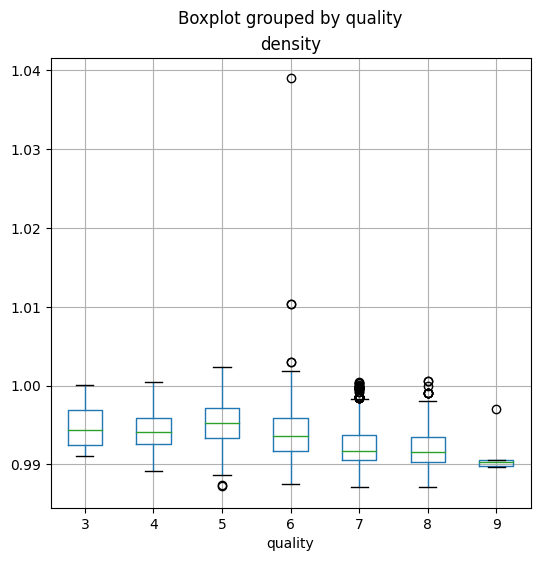

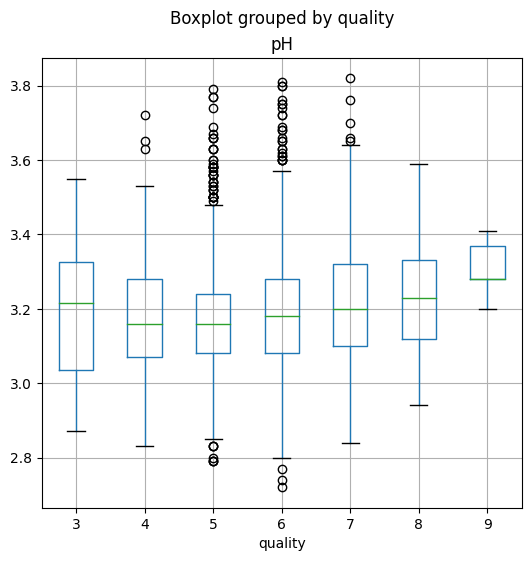

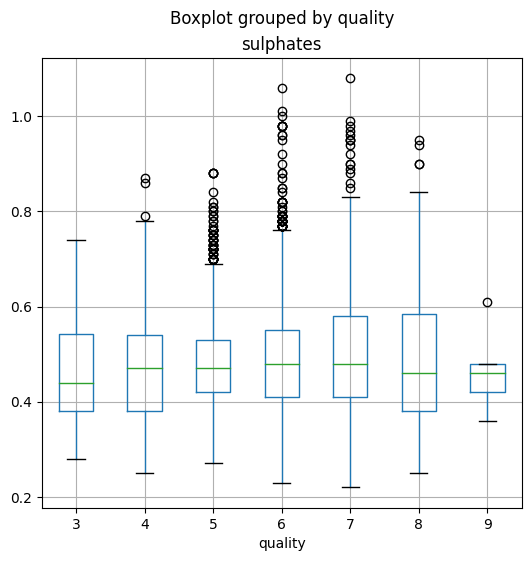

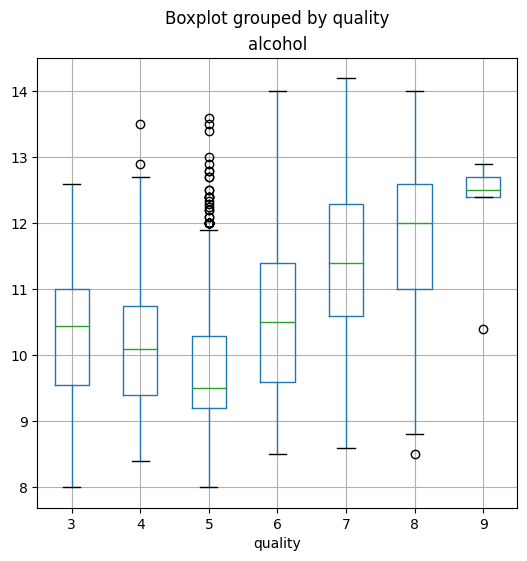

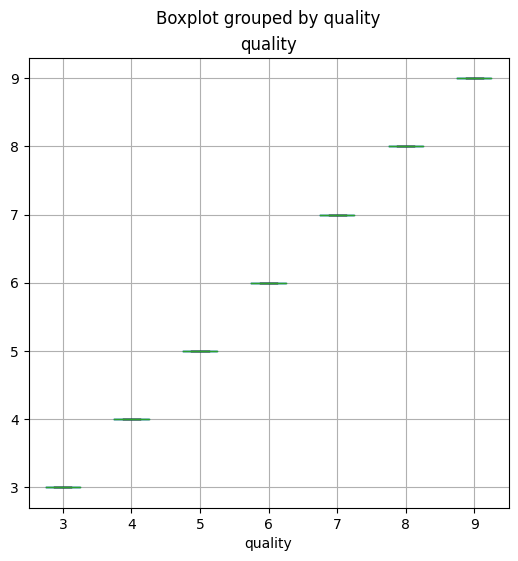

In [26]:
# Box Plot to check for Outliers
for i in WHITE.columns.values:
  WHITE.boxplot(column=i,by='quality',grid=True,figsize=(6,6))

Points outside box plot are outliers.

In [27]:
# Create correlation matrix
corr_matrix = WHITE.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop features
WHITE.drop(to_drop, axis=1, inplace=True)

# code from https://stackoverflow.com/a/52509954, with only necessary naming and value changes

##### Splitting Dataset into TRAIN, VALIDATION AND TEST

In [28]:
# Splitting Target Value(Quality) and Features X--> Input features to Model Y--> Wine Quality Score
X=WHITE.drop(["quality"],axis=1)
Y=WHITE["quality"]

In [29]:
# Splitting dataset into 60-20-20 ratio
from sklearn.model_selection import train_test_split
x, x_test2, y, y_test2 = train_test_split(X,Y,test_size=0.2,train_size=0.8)
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size = 0.25,train_size =0.75)

#### Preprocessing

In [30]:
# Scale the features to have zero mean and unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled2 = scaler.transform(x_test2)

### **RandomForest**

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from tabulate import tabulate

# Hyperparameters which will be varied discretely
max_depth_values = np.linspace(10,60,5)
n_estimators_values = [50,100,200,300,400,500]

# Initialize variables 
results = []

# Loop over each combination of hyperparameters
for max_depth in max_depth_values:
    for n_estimators in n_estimators_values:
        # Initialize the Random Forest model with current hyperparameters
        rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=10)

        # Train the model on the training data
        rf_model.fit(x_train_scaled, y_train)

        # Validate the model on the validation data
        y_val_pred = rf_model.predict(x_val_scaled)

        # Calculate R-squared
        r_squared = r2_score(y_val, y_val_pred)

        # Store results
        results.append([r_squared, max_depth, n_estimators])

# Print the results as a table
print(tabulate(results, headers=['R-squared', 'Max Depth', 'N Estimators'], tablefmt='pretty'))

+---------------------+-----------+--------------+
|      R-squared      | Max Depth | N Estimators |
+---------------------+-----------+--------------+
| 0.4037329314795103  |   10.0    |      50      |
| 0.40747287631446605 |   10.0    |     100      |
| 0.4117513144093702  |   10.0    |     200      |
| 0.41226523673947735 |   10.0    |     300      |
| 0.41321174897950363 |   10.0    |     400      |
| 0.4124583006162994  |   10.0    |     500      |
| 0.45086583618557097 |   22.5    |      50      |
| 0.4564381687867328  |   22.5    |     100      |
| 0.46212841266214166 |   22.5    |     200      |
| 0.46244567049914054 |   22.5    |     300      |
|  0.461407343937692  |   22.5    |     400      |
| 0.46031262924272165 |   22.5    |     500      |
| 0.44987422723230686 |   35.0    |      50      |
| 0.4565013951086001  |   35.0    |     100      |
| 0.46149783012689083 |   35.0    |     200      |
| 0.4633281936775192  |   35.0    |     300      |
| 0.46282216458820324 |   35.0 

In [32]:
# Finding the hyperparamters which give best model (higher R2 score => Better model)
best_r_squared2 = -float('inf')
best_max_depth2 = None
best_n_estimators2 = None

# Loop through the results to find the best R-squared and its corresponding hyperparameters
for r_squared, max_depth, n_estimators in results:
    if r_squared > best_r_squared2:
        best_r_squared2 = r_squared
        best_max_depth2 = max_depth
        best_n_estimators2 = n_estimators
       
# Train the final model with the best hyperparameters on the entire training set
final_rf_model2 = RandomForestRegressor(n_estimators=best_n_estimators2, max_depth=best_max_depth2, random_state=42)
final_rf_model2.fit(x_train_scaled, y_train)

# Test the final model on the test data
y_test_pred = final_rf_model2.predict(x_test_scaled2)

# Calculate test R-squared
test_r_squared_rf = r2_score(y_test2, y_test_pred)
print(f"Test R-squared: {test_r_squared_rf}")

Test R-squared: 0.5062958009780475


##### Feature Importance

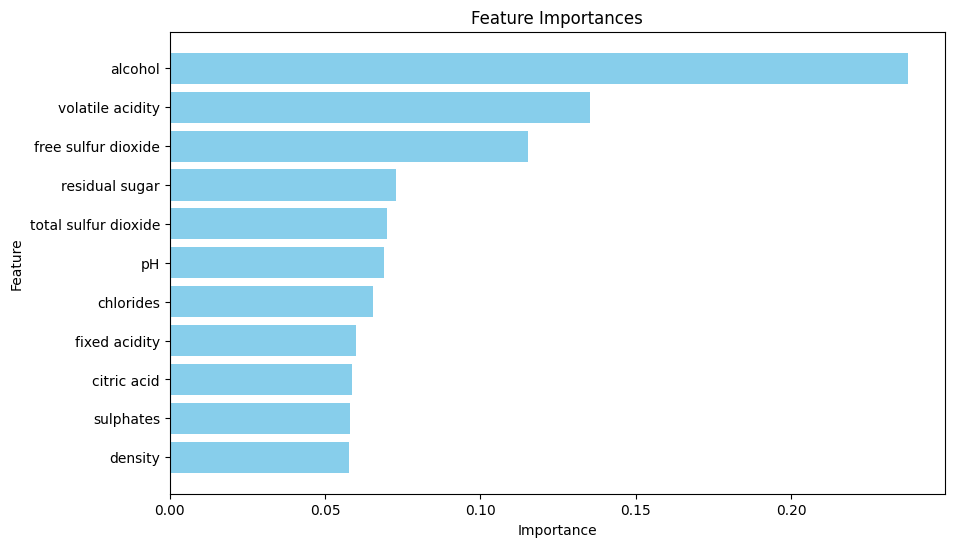

In [33]:
# Get feature importances from the final model
feature_importances = final_rf_model2.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to show most important features at the top
plt.show()

#Above code is taken from ChatGPT

We can thus see that **alcohol** is the most important feature for this model.

### **Support vector regression with RBF kernel**

In [34]:
from sklearn.svm import SVR

# Range of hyperparameters to try
param_C= [0.01,0.1, 1, 10, 100]  # Varying the C parameter
param_gamma= ['scale', 'auto'] # Varying gamma parameter

# Initialize variables 
results = []

# Iterate over each combination of hyperparameters
for C in param_C:
    for gamma in param_gamma:
        # Train the SVR model with RBF kernel
        svr_model = SVR(kernel='rbf', C=C, gamma=gamma)
        svr_model.fit(x_train_scaled, y_train)
        
        # Validate the SVR model on the validation data
        y_val_pred = svr_model.predict(x_val_scaled)
        
        # Calculate R-squared
        r_squared = r2_score(y_val, y_val_pred)

        # Store results
        results.append([r_squared, C, gamma])

# Print the results as a table
print(tabulate(results, headers=['R-squared', 'C', 'GAMMA'], tablefmt='pretty'))

+---------------------+------+-------+
|      R-squared      |  C   | GAMMA |
+---------------------+------+-------+
| 0.17392268368898245 | 0.01 | scale |
| 0.17392268368898245 | 0.01 | auto  |
| 0.3242236016561454  | 0.1  | scale |
| 0.3242236016561454  | 0.1  | auto  |
| 0.3693285971076562  |  1   | scale |
| 0.3693285971076562  |  1   | auto  |
| 0.3747336972088192  |  10  | scale |
| 0.3747336972088192  |  10  | auto  |
| 0.19134121858385045 | 100  | scale |
| 0.19134121858385045 | 100  | auto  |
+---------------------+------+-------+


In [35]:
# Finding the hyperparamters which give best model (higher R2 score => Better model)
best_r_squared = -float('inf')
best_C2 = None
best_gamma2 = None

# Loop through the results to find the best R-squared and its corresponding hyperparameters
for r_squared, C, gamma in results:
    if r_squared > best_r_squared:
        best_r_squared = r_squared
        best_C2 = C
        best_gamma2 = gamma

# Train the final model with the best hyperparameters on the entire training set
final_svr_model = SVR(kernel='rbf', C=best_C2, gamma=best_gamma2)
final_svr_model.fit(x_train_scaled, y_train)

# Test the final model on the test data
y_test_pred = final_svr_model.predict(x_test_scaled2)

# Calculate test R-squared
test_r_squared_svr = r2_score(y_test2, y_test_pred)
print(f"Test R-squared: {test_r_squared_svr}")

Test R-squared: 0.37897606474684187


#### Feature Importance

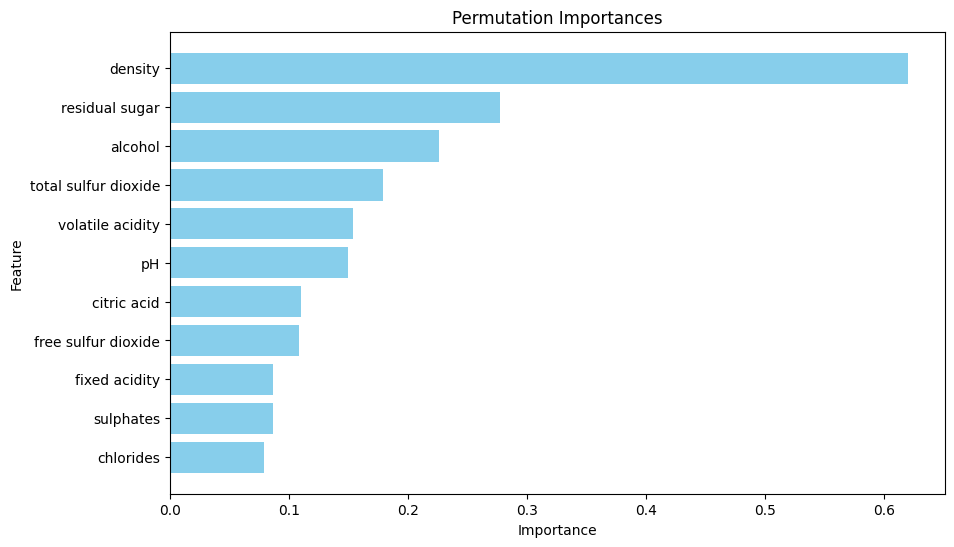

In [36]:
from sklearn.inspection import permutation_importance
# Calculate permutation importances
perm_importance = permutation_importance(final_svr_model, x_test_scaled2, y_test2, n_repeats=30, random_state=42)

# Get feature names
feature_names = X.columns

# Plot permutation importances
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Permutation Importances')
plt.show()

We can thus see that **density** is the most important feature for this model.

For red wine, Alcohol is the most important variable for both the models. But other than that, importance of variables is different for both models, i.e., variables which are important for RF are not necessarily important for SVR. 

However for white wine, Alcohol is most important for RF model but density becomes most important for SVR model.

In [37]:
results = pd.DataFrame({
    'Model': ['Random Forest','SVR With RBF Kernel'],
    'Score': [test_r_squared_rf, test_r_squared_svr]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

Model
Score                        
0.506296        Random Forest
0.378976  SVR With RBF Kernel

For both Red and white wine, RF model has greater score than SVR model and thus we will use RF model in both cases to predict the quality.

### Testing of Red wine with White wine model

In [38]:
# Test the RF model on the test data
y_test_pred_red = final_rf_model2.predict(x_test_scaled)

# Calculate test R-squared
test_r_squared_rf_red = r2_score(y_test, y_test_pred_red)
print(f"Test R-squared for Red: {test_r_squared_rf_red}")

Test R-squared for Red: 0.042886087961368835


### Testing of White wine with Red wine model

In [39]:
# Test the RF model on the test data
y_test_pred_white = final_rf_model.predict(x_test_scaled2)

# Calculate test R-squared
test_r_squared_rf_white = r2_score(y_test2, y_test_pred_white)
print(f"Test R-squared for White: {test_r_squared_rf_white}")

Test R-squared for White: 0.04004355740249155


We can see that on testing Red wine with model for White and vice versa, we get very very poor score (0.16) and (-0.02) respectively. Thus, we can conclude that the model for red wines is not applicable to white wines and vice versa.

Now I have created an app using streamlit to predict the quality and type of wine.  I have already preprocessed the dataset of red wine and white wine, figuring out the content of different constituents in the wine and setting threshold as to what content of a constituent makes it good and bad and benchmarked the model (random forest) against different models like regression, SVM Classifier and showed its superiority.

In [ ]:
#Importing Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import streamlit as st

## RED WINE
# Importing red wine quality file
RED=pd.read_csv('winequality-red.csv',sep=";")

# Splitting Target Value(Quality) and Features X--> Input features to Model Y--> Wine Quality Score
X_red=RED.drop(["quality"],axis=1)
Y_red=RED["quality"]

# Scale the features to have zero mean and unit variance
scaler = StandardScaler()
x_train_red = scaler.fit_transform(X_red)

# Train the model with the best hyperparameters on the entire training set
red_model = RandomForestRegressor(n_estimators=500, max_depth=60, random_state=42)
red_model.fit(x_train_red, Y_red)

## WHITE WINE
# Importing white wine quality file
WHITE=pd.read_csv('winequality-white.csv',sep=";")

# Splitting Target Value(Quality) and Features X--> Input features to Model Y--> Wine Quality Score
X_white=WHITE.drop(["quality"],axis=1)
Y_white=WHITE["quality"]

# Scale the features to have zero mean and unit variance
x_train_white = scaler.fit_transform(X_white)

# Train the model with the best hyperparameters on the entire training set
white_model = RandomForestRegressor(n_estimators=200, max_depth=22, random_state=42)
white_model.fit(x_train_white, Y_white)

def predict_quality(model, features):
    prediction = model.predict(features)
    return prediction

# Creating Streamlit UI
st.title('Wine Quality Predictor')

# Option to choose red or white wine
wine_type = st.radio("Select wine type:", ("red", "white"))

if wine_type == "red":
    df = RED
    model = red_model
else:
    df = WHITE
    model = white_model

df = pd.read_csv('winequality-{}.csv'.format(wine_type), sep=';')
X = df[df.keys()[:-1]]  # To exclude the target variable 'quality'

# Add sliders for feature input
features = {}
for i,column in enumerate(X.columns):
    input= st.slider(f"Select value of {column}",
                     float(X[column].min()), 
                     float(X[column].max()), 
                     float(X[column].mean()),
                     0.001, 
                     key=f'slider_{i}')  
    features[column] = (input - np.mean(X[column])) / np.std(X[column]) # Normalizing raw input with same values as used for training data

if st.button('Get Quality'):
    features_df = pd.DataFrame(features,index=['0'])  # Converting features to a DataFrame
    prediction = predict_quality(model, features_df) # Making prediction
    st.write(f'Predicted Wine Quality: {prediction[0]}') # Display prediction result